In [11]:
%%time

# Import dask
import dask

# Use dask jobqueue
from dask_jobqueue import PBSCluster

# Import a client
from dask.distributed import Client

# Setup your PBSCluster
cluster = PBSCluster(
    cores=1, # The number of cores you want
    memory='100GB', # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='/glade/scratch/${USER}/dask/casper-dav/local-dir', # Use your local directory
    resource_spec='select=1:ncpus=1:mem=100GB', # Specify resources
    project='UMAL0005', # Input your project ID here
    walltime='22:00:00', # Amount of wall time
    interface='ib0', # Interface to use
)

# Scale up # of nodes
#cluster.scale(4)
cluster.adapt(minimum=1, maximum=100, wait_count=60)

# Change your url to the dask dashboard so you can see it
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})



# Setup your client
client = Client(cluster)



import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from metpy.units import units
from metpy.plots import SkewT
import metpy.calc as mpcalc
from metpy.units import pandas_dataframe_to_unit_arrays
import cartopy.crs as ccrs
#from openpyxl import load_workbook                          #commented in my-npl-ml

import xarray as xr
#import dask.array as da
#import dask

import warnings
warnings.filterwarnings('ignore')




data_output3=xr.open_dataset('/glade/work/afallah/data/masked_SM_OL_198009_weekly.nc')    #xr.open_dataarray
#data_output3.SoilMoist_tavg.isel(time=200).plot()

soil_moisture = data_output3.SoilMoist_tavg

SM5_US_point = soil_moisture.load()
SM5_US_point = SM5_US_point.persist()



CPU times: user 39.4 ms, sys: 289 ms, total: 328 ms
Wall time: 503 ms


In [6]:
#temporary
#data_output3=xr.open_dataset('/glade/work/afallah/data/masked_SM_DA_198009_daily.nc')    #xr.open_dataarray

#soil_moisture = data_output3.SoilMoist_tavg

#SM5_US_point = soil_moisture.load()
#SM5_US_point = SM5_US_point.persist()


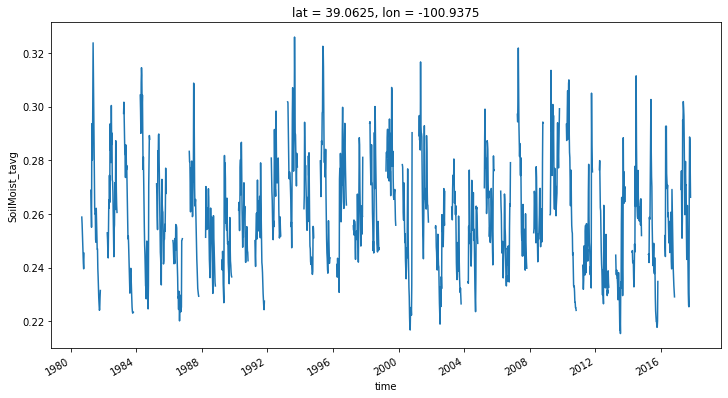

In [2]:
SM5_US_point.sel(lon=-100.9375,lat=39.0625).plot(aspect=2, size=6) 


In [115]:
SM5_US_point.isel(time=59+53+52+52+52+52+52+53+52+52+52+52+53+52+52+52+52+52+53+52+52+52+52+53+52+52+52+52+52+53+52+52+52+52+52+53+52)

<xarray.DataArray 'SoilMoist_tavg' (lat: 224, lon: 464)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon      (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
    time     datetime64[ns] 2017-10-29
Attributes:
    grid_mapping:  spatial_ref

In [9]:
x = SM5_US_point.sel(lon=-100.9375,lat=39.0625)

percentile_20 = np.zeros(53)
for i in range(53):
    week_data = np.append(x[i])
    percentile_20[i] = np.percentile(week_data, 20)

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [203]:

temperature_data = SM5_US_point.sel(lon=-100.9375,lat=39.0625)

temperature_data = temperature_data.values.reshape((37, -1))


# calculate percentiles for each week
percentiles = []
for week in range(52):
    week_temps = temperature_data[:, week]
    percentiles.append(np.percentile(week_temps, 20))

# calculate percentile for week 53 in leap years
leap_year_temps = temperature_data[:, -1]
if leap_year_temps.size > 0:
    percentiles.append(np.percentile(leap_year_temps, 20))

print(percentiles)

ValueError: cannot reshape array of size 1939 into shape (37,newaxis)

In [18]:
temperature_data = SM5_US_point.sel(lon=-100.9375,lat=39.0625)

temperature_data = temperature_data.values.reshape((37, -1))

# calculate percentiles for each week
percentiles = []
for week in range(52):
    week_temps = []
    for year in range(37):
        week_temps.append(temperature_data[year, week])
    percentiles.append(np.percentile(week_temps, 20))

# calculate percentile for week 53 in leap years
leap_year_temps = []
for year in range(37):
    if year % 4 == 0:
        leap_year_temps.append(temperature_data[year, 52])
if len(leap_year_temps) > 0:
    percentiles.append(np.percentile(leap_year_temps, 20))

print(percentiles)

ValueError: cannot reshape array of size 1939 into shape (37,newaxis)

In [216]:
x = SM5_US_point.sel(lon=-100.9375,lat=39.0625)

temperature_data = temperature_data.values.reshape((37, -1))

ValueError: cannot reshape array of size 1939 into shape (37,newaxis)

In [29]:
x.sel(time = x['time.week'] == 43)

<xarray.DataArray 'SoilMoist_tavg' (time: 38)>
array([0.24738081, 0.2344772 , 0.2604129 , 0.22132452, 0.28428346,
       0.265432  , 0.24886048, 0.22790278, 0.23196718, 0.23737204,
       0.24180192, 0.22574124, 0.25267175, 0.27840483, 0.24961248,
       0.2442892 , 0.26394433, 0.28242669, 0.24939997, 0.2560103 ,
       0.28971663, 0.25720853, 0.27020535, 0.22422485, 0.2505492 ,
       0.2775389 , 0.27533415, 0.239122  , 0.29050335, 0.29813617,
       0.22343123, 0.27560127, 0.2328604 , 0.26400644, 0.25076157,
       0.23932883, 0.22706896, 0.26280856], dtype=float32)
Coordinates:
    lat      float64 39.06
    lon      float64 -100.9
  * time     (time) datetime64[ns] 1980-10-26 1981-10-25 ... 2017-10-29
Attributes:
    grid_mapping:  spatial_ref

In [52]:
#test
#monthly test
percentile_20 = np.zeros(12)
for i in range(12):
    month_data = x.sel(time = x['time.month'] == i+1)
    percentile_20[i] = np.percentile(month_data, 20)
    
#weekly test  #each year has 43 weeks!
percentile_20 = np.zeros(43)
for i in range(43):
    week_data = x.sel(time = x['time.week'] == i+1)
    percentile_20[i] = np.percentile(week_data, 20)
    
#weekly test  #each year has 43 weeks!
percentile_20 = np.zeros(43)
for i in range(43):
    week_data = x[x['time.week'] == i+1]
    percentile_20[i] = np.percentile(week_data, 20)
    
#weekly test  #each year has 43 weeks!
percentile_20 = np.zeros(43)
for i in range(43):
    week_data = x[x.time.dt.week == i+1]
    percentile_20[i] = np.percentile(week_data, 20)
    
#weekly test  #each year has 43 weeks!
percentile_20 = np.zeros(43)
for i in range(43):
    week_data = x[x['time'].dt.week.astype(int) == i+1]
    percentile_20[i] = np.percentile(week_data, 20)
    
percentile_20 = np.zeros(53)
for i in range(53):
    week_data = np.append(x[i])
    percentile_20[i] = np.percentile(week_data, 20)
    
    #test
    #x1 = SM5_US_point.groupby(SM5_US_point.time.dt.month)
    #SM_q20 = x1.quantile([0.20])
    #SM_q40 = x1.quantile([0.40])
    
#calculating FD using Xarray
#step1: quanitles 
#x = SM5_US_point
#x1 = x.groupby(x.time.dt.week)
#SM_q20_variable = x1.quantile([0.2],dim="time")

percentile_20 = SM5_US_point.groupby("time.week").quantile(0.2, dim="time")  #same result!

#step2: plot quanitles 
percentile_20.isel(lat = 100, lon=50).plot()

In [80]:
#test
#provides weeks with below 20th percentiles accorrding to 53 weeks in each year

temp = SM5_US_point.groupby('time.week')

one_per_week = xr.ones_like(SM5_US_point)

num_dry_weeks = one_per_week.where(temp < percentile_20).sum(dim=("lat","lon"))



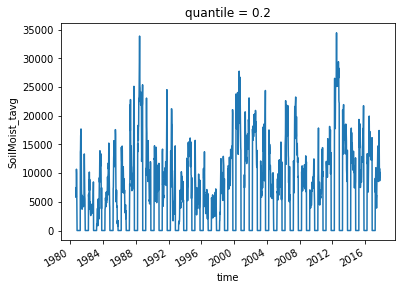

In [81]:
num_dry_weeks.plot()

In [25]:
#DO NOT REMOVE!
#compute 20th percentiles/
percentile_20 = SM5_US_point.groupby("time.week").quantile(0.2, dim="time")  
percentile_40 = SM5_US_point.groupby("time.week").quantile(0.4, dim="time")  

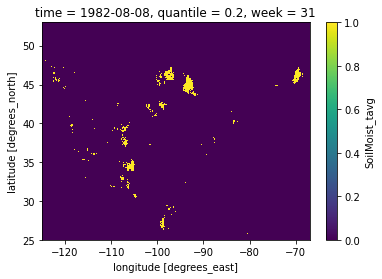

In [34]:
#keep this test
#provides weeks with below 20th percentiles accorrding to 53 weeks in each year
temp = SM5_US_point.groupby('time.week')
one_per_week = xr.ones_like(SM5_US_point)

#weeks if 3 consequetive weeks were below 20th percentiles 
consecutive_weeks_below_20th = one_per_week.where(temp < percentile_20).rolling(time=3, min_periods=3).sum()   #min_periods=?
dry_weeks3 = (consecutive_weeks_below_20th == 3).where(consecutive_weeks_below_20th)

dry_weeks3.isel(time=100).plot()

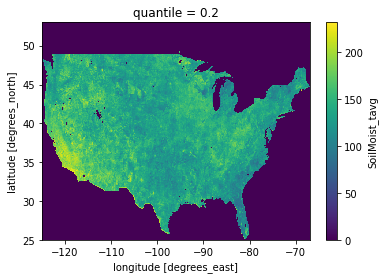

In [35]:
dry_weeks3.sum(dim="time").plot()

In [18]:
#new1
#provides weeks with below 20th percentiles accorrding to 53 weeks in each year
temp = SM5_US_point.groupby('time.week')
one_per_week = xr.ones_like(SM5_US_point)
below_20 = temp < percentile_20
above_40 = temp > percentile_40
below_20_3W = below_20.rolling(time=3, center=True).sum(dim='time') == 3

#below20 = temp.rolling(time=3, center=True).max(dim='time') < percentile_20
#above40 = temp.rolling(time=3, center=True).min(dim='time') > percentile_40
#window = below20 & above40.shift(time=-3)


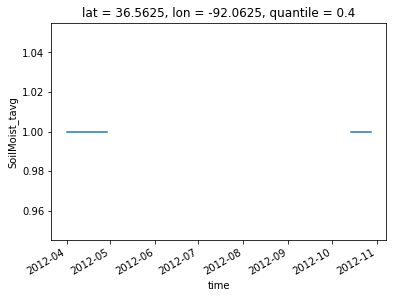

In [52]:
#a = one_per_week.where(temp < percentile_20)
#b = one_per_week.where(temp > percentile_40)
one_per_week = xr.ones_like(SM5_US_point)

below_20 = temp < percentile_20
above_40 = temp > percentile_40

consecutive_weeks = below_20.rolling(time=3, min_periods=3).sum()    #,center=True  ???  #.dropna('time')  ???
a = one_per_week.where(consecutive_weeks == 3)

consecutive_weeks = above_40.rolling(time=3, min_periods=3).sum()    #,center=True  ???  #.dropna('time')  ???
b = one_per_week.where(consecutive_weeks >= 1)

b.sel(lat = 36.5625, lon=-92.0625).sel(time=slice("2012-01-01","2012-12-31")).plot()
#below_20.rolling(time=3, center=True).sum(dim='time').sel(lat = 36.5625, lon=-92.0625).plot()
#below_20_3W.sel(lat = 36.5625, lon=-92.0625).sel(time=slice("2011-01-01","2011-12-31")).plot()


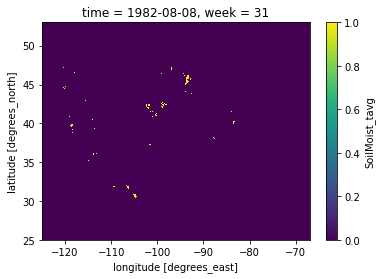

In [94]:
#new2
#provides weeks with below 20th percentiles accorrding to 53 weeks in each year
temp = SM5_US_point.groupby('time.week')
one_per_week = xr.ones_like(SM5_US_point)

# Find the weeks that were below the 20th percentile for 3 consecutive weeks
below_20 = temp < percentile_20
consecutive_weeks = below_20.rolling(time=3, min_periods=3).construct('window_dim').dropna(dim='time')    #,center=True  ???  #.dropna('time')  ???

# Find the weeks that had at least one week above the 40th percentile in three weeks earlier
above_40 = temp > percentile_40
shifted_above_40 = above_40.shift(time=3)
three_weeks_earlier = shifted_above_40.rolling(time=3, min_periods=3).construct('window_dim').dropna(dim='time')

# Find the final result by combining the two masks
#dry_weeks_with_above = one_per_week.where((consecutive_weeks ==3) & (three_weeks_earlier >=1), other=0)
dry_weeks = one_per_week.where(consecutive_weeks ==3, other=0)
dry_weeks_with_above = dry_weeks.where(three_weeks_earlier >=1, other=0)

dry_weeks_with_above.isel(time=100).plot()


In [104]:
# Find the weeks that were below the 20th percentile for 2 consecutive weeks
temp = SM5_US_point.groupby('time.week')
below_20 = temp < percentile_20
consecutive_weeks = below_20.rolling(time=3, min_periods=3, center=True).construct('window_dim').dropna(dim='time')    #,center=True  ???  #.dropna('time')  ???


In [105]:
window_1_bool = consecutive_weeks.all(dim='window_dim').astype(int)   #time:1937

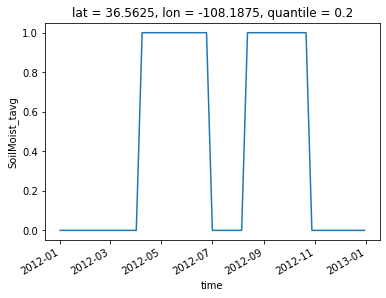

In [106]:
window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

In [107]:
# Find the weeks that were above the 40th percentile for one of the 3 consecutive weeks ealier 

above_40 = temp > percentile_40    #should be considered the time shift in calculating above_40???????
three_weeks_earlier = above_40.shift(time=3).rolling(time=3, min_periods=3, center=True).construct('window_dim').dropna(dim='time')    #,center=True  ???  #.dropna('time')  ???


In [108]:
window_2_bool = three_weeks_earlier.any(dim='window_dim').astype(int)    #time:1934 start late since shifted 

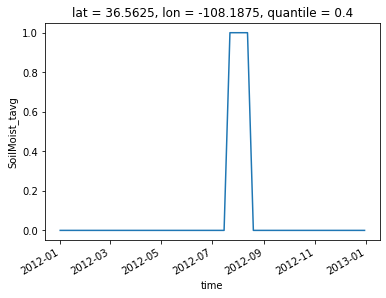

In [109]:
window_2_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

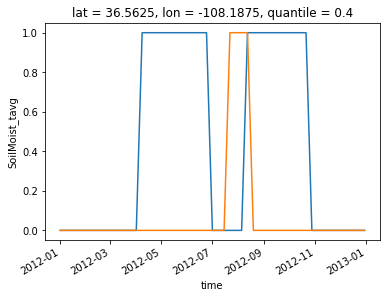

In [44]:
window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()
window_2_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()



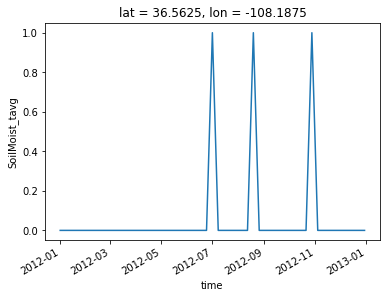

In [16]:
((window_2_bool.diff('time') ==-1) | (window_1_bool.diff('time') ==-1)).astype(int).sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

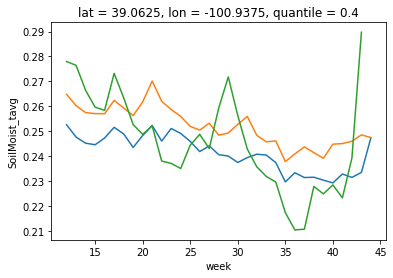

In [121]:
percentile_20.sel(lat = 39.0625, lon=-100.9375).plot()
percentile_40.sel(lat = 39.0625, lon=-100.9375).plot()

y= SM5_US_point.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2000-01-01","2000-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)


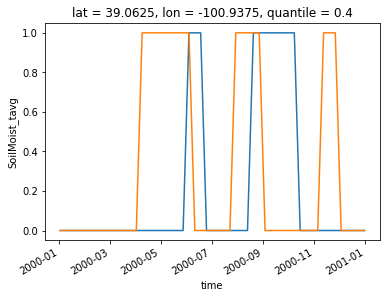

In [112]:
window_1_bool.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2000-01-01","2000-12-31")).plot()
window_2_bool.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2000-01-01","2000-12-31")).plot()


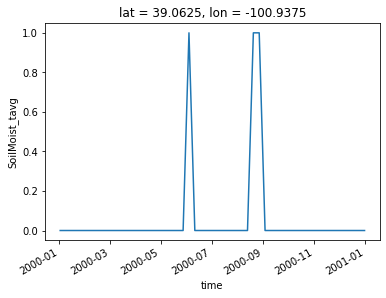

In [113]:
#here added recenlty 
#(window_1_bool & window_2_bool).sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()
(window_1_bool & window_2_bool).sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2000-01-01","2000-12-31")).plot()

#onset_num = (window_1_bool & window_2_bool)    #it is not accuarte since onset should be only for one week!
#onset_num.mean('time').plot()



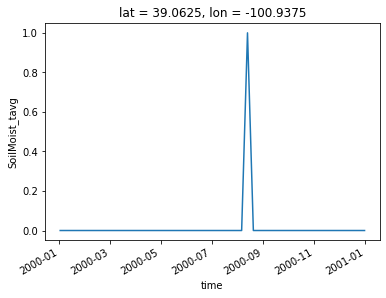

In [114]:
binary_onset_20 = xr.open_dataset('/glade/work/afallah/data/binary_onset_20_DA_198009_new_way_weekly_clima_percentiles.nc')    #xr.open_dataarray

binary_onset_20.SoilMoist_tavg.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2000-01-01","2000-12-31")).plot()

In [ ]:
wet_periods.groupby('time')

DataArrayGroupBy, grouped over 'time' 
1939 groups with labels 1980-09-07, ..., 2017-10-29.

In [ ]:
#consecutive dry weeks function
def consecutive(da, thresh=1, cum_type ='cdw'):
    count = 0
    overall_counter = []
    for i,j in enumerate(da):
        if cum_type == 'cdw':
            count = count+1 if da[i] == thresh else 0
        overall_counter.append(count)
    return max(overall_counter)

In [ ]:
Data = window_1_bool   #1937,224,464


In [ ]:
years = list(set(Data['time.year'].values))   #weeks from 1:53
#weeks = np.arange(1936)  
#weeks = list(weeks)

In [ ]:
size = list(Data.shape)
size[0] = len(years)
#size = list(Data.shape)


In [ ]:
cdw = np.zeros(size) #consequtive dry weeks

In [ ]:
#ignore
%%time
for i,yr in enumerate(years):
    for a in np.arange(cdw.shape[1]):
        for b in np.arange(cdw.shape[2]):
            cdw[i,a,b] = consecutive(Data.sel(time=str(yr))[:,a,b].values, thresh=1, cum_type ='cdw')
            
            
#Data.isel(time=wk, lat=a, lon=b).values            

In [ ]:
#ignore
#cdw Data Array
new_cdw = xr.DataArray(data=cdw, 
                       dims=list(Data.dims),
                       coords=dict(
                           lon=Data.lon,
                           lat=Data.lat,
                           time=pd.to_datetime(years,format='%Y'),
                       ),
                       name='cdw',
                       attrs=dict(
                           description="consecutive wet weeks",
                           units="weeks",
                       ),
                      )

In [ ]:
#here starts 

In [ ]:
#consecutive dry weeks function
def consecutive(da, thresh=1):
    count = 0
    overall_counter = []
    i=0
    while i < len(da):
        if da[i] == thresh:
            count+=1
            if i == len(da)-1:
                overall_counter.append(count)
                
        else:
            overall_counter.append(count)
            count=0
            
        i+=1
    return (overall_counter)
        

In [ ]:
cdw = np.zeros((Data.shape[1], Data.shape[2]))    #consequtive dry weeks


In [ ]:
%%time
#for i,yr in enumerate(years):
for a in np.arange(cdw.shape[0]):
    for b in np.arange(cdw.shape[1]):
        cdw[a,b] = consecutive(Data[:,a,b].values, thresh=1)
            
            
#Data.isel(time=wk, lat=a, lon=b).values            

CPU times: user 2min 21s, sys: 76.5 ms, total: 2min 21s
Wall time: 2min 24s


In [ ]:
#cdw Data Array
new_cdw = xr.DataArray(data=cdw, 
                       dims=list(Data[0,:,:].dims),
                       coords=dict(
                           lon=Data.lon,
                           lat=Data.lat,
                           #time=pd.to_datetime(years,format='%Y'),
                       ),
                       name='cdw',
                       attrs=dict(
                           description="consecutive wet weeks",
                           units="weeks",
                       ),
                      )

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5]),
 <BarContainer object of 10 artists>)

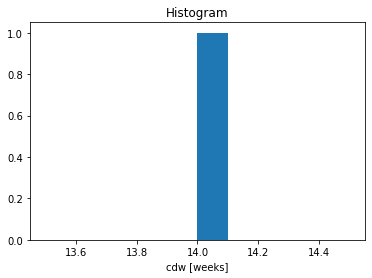

In [ ]:
new_cdw.sel(lat = 36.5625, lon=-108.1875).plot()   #.sel(time=slice("2012-01-01","2012-12-31")).plot()

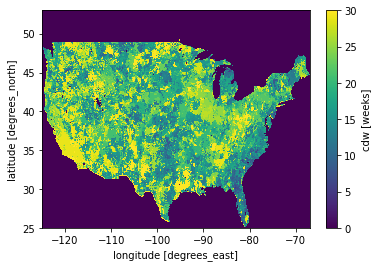

In [ ]:
new_cdw.plot()

In [ ]:
x = SM5_US_point.sel(lon=-100.9375,lat=39.0625)

def consecutive(da, thresh=1):

    #weekly test  #each year has 43 weeks!
    percentile_20 = np.zeros(52)
    for i in range(52):
        week_data = da.sel(time = da['time.week'] == i+1)
        percentile_20[i] = np.percentile(week_data, 20)
    return percentile_20


In [ ]:
percentile_20 = np.zeros(52)
len(percentile_20)

52

In [ ]:
consecutive(x, thresh=1)

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.2476749 , 0.24522898, 0.24460156,
       0.24730891, 0.25159258, 0.24894833, 0.24352098, 0.24828435,
       0.2523238 , 0.24606525, 0.25113581, 0.24911737, 0.24594497,
       0.2418488 , 0.24415543, 0.24061837, 0.24005508, 0.23748476,
       0.23944684, 0.24079646, 0.24046084, 0.23741032, 0.22968949,
       0.23337769, 0.2314528 , 0.23156607, 0.23039411, 0.22929454,
       0.23286398, 0.23149533, 0.23350712,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan])

In [ ]:
len(percentile_20)

52

In [ ]:
years = list(set(x['time.year'].values))   #weeks from 1:53
len(years)

38

In [8]:
x.time

<xarray.DataArray 'time' (time: 1938)>
array(['1980-09-07T00:00:00.000000000', '1980-09-14T00:00:00.000000000',
       '1980-09-21T00:00:00.000000000', ..., '2017-10-08T00:00:00.000000000',
       '2017-10-15T00:00:00.000000000', '2017-10-22T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    lat      float64 39.06
    lon      float64 -100.9
  * time     (time) datetime64[ns] 1980-09-07 1980-09-14 ... 2017-10-22

In [ ]:
aa = np.repeat(percentile_20, 38)
len(aa)

1976

In [ ]:
aa = np.repeat(percentile_20, 38)
len(aa[8*4+2:1976])

1942

In [ ]:
p_20 = np.zeros(52)
aa = np.repeat(p_20, 38)
len(aa)

1976

In [3]:
#SM5_US_point

In [68]:
#data_new = SM5_US_point.sel(time=slice("1981-01-01","2017-12-31"))
weekly_soil_moisture_data = SM5_US_point.sel(lon=-92.0625,lat=36.5625)
#weekly_soil_moisture_data    #1938

In [69]:
#correct example

import xarray as xr

# Load your NLDAS weekly soil moisture data into an xarray Dataset
# Replace 'your_data.nc' with the actual file path.
#ds = xr.open_dataset('your_data.nc')

# Assuming your data has a variable called 'soil_moisture' and dimensions 'time', 'lat', and 'lon'.

# Select the specific grid cell using sel
selected_grid_cell = weekly_soil_moisture_data

# Calculate the weekly climatological mean for the selected grid cell
weekly_climatological_mean = selected_grid_cell.groupby(selected_grid_cell.time.dt.week).mean(dim='time')
weekly_climatological_mean[43] = np.nan   #the value has no  sense!

# Expand the weekly climatological mean to match the shape of the original data
expanded_climatological_mean = weekly_climatological_mean.sel(week=weekly_soil_moisture_data['time.week'], method='nearest')

# Calculate weekly anomalies for the selected grid cell
soil_moisture_anomaly = selected_grid_cell - expanded_climatological_mean

# Now, soil_moisture_anomaly contains your weekly soil moisture anomalies for the selected grid cell


In [70]:
weekly_climatological_mean

<xarray.DataArray 'SoilMoist_tavg' (week: 53)>
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.34171444, 0.3416544 , 0.3380028 , 0.33473262,
       0.336016  , 0.33717877, 0.33196133, 0.32965565, 0.32555977,
       0.32189608, 0.31682947, 0.3102063 , 0.30401716, 0.29860687,
       0.29371136, 0.285558  , 0.27714825, 0.27044562, 0.26689667,
       0.26485878, 0.2631243 , 0.26006275, 0.25511894, 0.2553003 ,
       0.25598806, 0.26057163, 0.26774397, 0.26559868, 0.26856452,
       0.27905414, 0.28300485, 0.28867224,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan], dtype=float32)
Coordinates:
    lat      float64 36.56
    lon      float64 -92.06
  * week     (week) int64 1 2 3 4 5 6 7 8 9 10 ... 44 45 46 47 48 49 50 51 52 53

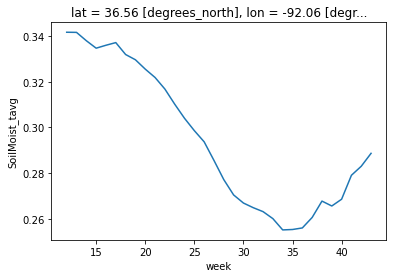

In [71]:
weekly_climatological_mean.plot()

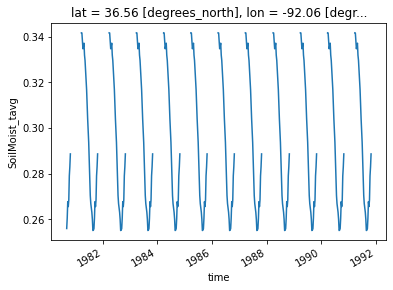

In [83]:
expanded_climatological_mean[0:600].plot()

In [ ]:
#weekly_climatological_mean

In [86]:
#expanded_climatological_mean.values[0:600]

In [52]:

#Let's only selcet Apri-Oct and the month before and after (Mar-Nov which is nan here)
ds = data_new.sel(time=data_new["time.month"].isin([4,5,6,7,8,9,10]))    #add month 3 and 11   #1462
#ds.sel(time=slice("2012-01-01","2012-12-31"))
da1 = ds
percentile_20 = da1.sel(lon=-92.0625,lat=36.5625).groupby("time.week").quantile(0.2, dim="time")#.compute()

percentile_20 = np.concatenate([percentile_20 for _ in range(38)])    #40*38=1520
#percentile_20 = percentile_20[6*4+2:]   #only for year 1980, remove months 3,4, 5, 6, 7, 8    #1494

In [53]:
np.size(percentile_20)
#ds.sel(lon=-92.0625,lat=36.5625).values[0:600]
#ds

1216

In [97]:
#percentile_20    1216
#ds.time.values[0:600]   #1130

In [7]:
#SM5_US_point   #1938 timestep 1980-09-07 to 2017-10-22
#ds              #1462 similar above but for months 3-11
#ds.sel(lon=-92.0625,lat=36.5625).values[0:300]

In [176]:

#Let's only selcet Apri-Oct and the month before and after (Mar-Nov which is nan here)
ds = SM5_US_point.sel(time=SM5_US_point["time.month"].isin([4, 5, 6, 7, 8, 9, 10]))    #add month 3 and 11
#ds.sel(time=slice("2012-01-01","2012-12-31"))
da1 = ds   #1462
percentile_20 = da1.sel(lon=-92.0625,lat=36.5625).groupby("time.week").quantile(0.2, dim="time")#.compute()

percentile_20 = np.concatenate([percentile_20 for _ in range(38)])    #32*38=1216
percentile_20 = percentile_20[5*4+2:]   #only for year 1980, remove months 4, 5, 6, 7, 8

In [177]:
SM_weekly = da1.sel(lon=-92.0625,lat=36.5625).resample(time='1W').mean()    #1939 weeks! 
#SM_weekly

In [178]:
percentile_20

array([0.22988679, 0.22478089, 0.23225212, ..., 0.25152251, 0.25764727,
       0.27008474])

In [179]:
np.size(percentile_20)   #1194

1194

In [180]:
percentile_20

array([0.22988679, 0.22478089, 0.23225212, ..., 0.25152251, 0.25764727,
       0.27008474])

In [109]:
import xarray as xr

# Load your NLDAS soil moisture data into an xarray Dataset or DataArray
# Replace 'your_data.nc' with the actual file path.
ds = ds

# Assuming your data has a variable called 'soil_moisture' and a time dimension called 'time'.

# Group by week and calculate the weekly climatological mean for soil moisture
weekly_climatological_mean = ds.groupby('time.week').mean(dim='time')

# Calculate weekly anomalies for soil moisture
soil_moisture_anomaly = ds- weekly_climatological_mean

# Now, soil_moisture_anomaly contains your weekly soil moisture anomalies as an xarray DataArray


In [115]:
weekly_climatological_mean.sel(lon=-92.0625,lat=36.5625)

<xarray.DataArray 'SoilMoist_tavg' (week: 40)>
array([       nan,        nan,        nan, 0.34171447, 0.34165442,
       0.33800283, 0.33473265, 0.336016  , 0.3371788 , 0.3319613 ,
       0.32965565, 0.32555977, 0.32189608, 0.3168294 , 0.31020632,
       0.3040172 , 0.29860687, 0.29371136, 0.28555802, 0.27714822,
       0.27044562, 0.2668967 , 0.26485878, 0.2631243 , 0.26006275,
       0.2551189 , 0.2553003 , 0.25598806, 0.26057166, 0.26774397,
       0.26559868, 0.2685645 , 0.2790542 , 0.28300485, 0.28867224,
       0.3319826 ,        nan,        nan,        nan,        nan],
      dtype=float32)
Coordinates:
    lat      float64 36.56
    lon      float64 -92.06
  * week     (week) int64 9 10 11 12 13 14 15 16 17 ... 41 42 43 44 45 46 47 48

In [116]:
ds.sel(lon=-92.0625,lat=36.5625).values[0:200]

array([0.23710696, 0.23979224, 0.24548304, 0.24878989, 0.24263573,
       0.24001923, 0.2634708 , 0.27364126,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.32544184, 0.31600514, 0.30318594,
       0.31722552, 0.3089827 , 0.30632633, 0.33044046, 0.32874972,
       0.32243618, 0.32467732, 0.31580895, 0.30664402, 0.31297302,
       0.2891944 , 0.28168243, 0.2654217 , 0.2615688 , 0.2609019 ,
       0.2565773 , 0.25466302, 0.27288154, 0.271449  , 0.27493015,
       0.25860104, 0.24805805, 0.24054821, 0.2310705 , 0.22814856,
       0.24017514, 0.27787697, 0.29165792,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.32143334, 0.32434446, 0.32046527, 0.31958285,
       0.33073092, 0.32669368, 0.3187441 , 0.32338208, 0.31939504,
       0.32091352, 0.31960854, 0.33055142, 0.32582402, 0.3344927 ,
       0.31031975, 0.29102638, 0.27290604, 0.2645596 , 0.26864

In [24]:
da1 = SM5_US_point

dates = pd.date_range(start='1980-09-07', end='2017-10-22', periods=1938) #freq='W'    #anyway add coords to pandas without xarray?  #maybe we can remove all additional week in leap years
da1 = xr.DataArray(da1.sel(lon=-92.0625,lat=36.5625), coords=[dates], dims=['time'])
#da1 = da1.where(da1.time.dt.week != 53, drop=True)  #data_no_53rd_week 1939 to 1932


In [26]:


# Calculate ISO year and ISO week number for each date
#da1['iso_year'] = da1.time.dt.isocalendar().year
#da1['iso_week'] = da1.time.dt.isocalendar().week

# Filter out weeks where ISO week number is 53
#da1_filtered = da1.where(da1.iso_week != 53, drop=True)

# Now, da1_filtered contains the data without weeks that cause years with 53 weeks


In [27]:
percentile_20 = da1.groupby("time.week").quantile(0.2, dim="time")#.compute()
percentile_20

<xarray.DataArray 'SoilMoist_tavg' (week: 53)>
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.3328113 , 0.33064014, 0.32685575, 0.3205985 ,
       0.32243984, 0.32184212, 0.31216972, 0.314019  , 0.3119247 ,
       0.30886685, 0.29973556, 0.28815469, 0.28713971, 0.28164868,
       0.27322336, 0.26796868, 0.26209819, 0.2506295 , 0.25150832,
       0.24786218, 0.24278609, 0.23796709, 0.23137152, 0.22589857,
       0.23250431, 0.23818955, 0.24022182, 0.23925149, 0.243069  ,
       0.24814706, 0.25886816, 0.26541144, 0.33198261,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan])
Coordinates:
    quantile  float64 0.2
  * week      (week) int64 1 2 3 4 5 6 7 8 9 10 ... 45 46 47 48 49 50 51 52 53

In [12]:
percentile_20 = np.concatenate([percentile_20 for _ in range(38)])
percentile_20 = percentile_20[8*4+2:]   #remove 1980-01 to 1980-09  #becuase groupby strats from week one to week 52!
# as a result 31th index of percentile_20 is equal to first April 1981


In [110]:

percentile_20[0:50]

array([0.22589857, 0.23250431, 0.23818955, 0.24022182, 0.23925149,
       0.243069  , 0.24814706, 0.25886816, 0.26541144, 0.33198261,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.3328113 ,
       0.33064014, 0.32685575, 0.3205985 , 0.32243984, 0.32184212,
       0.31216972, 0.314019  , 0.3119247 , 0.30886685, 0.29973556,
       0.28815469, 0.28713971, 0.28164868, 0.27322336, 0.26796868,
       0.26209819, 0.2506295 , 0.25150832, 0.24786218, 0.24278609])

In [14]:
np.size(percentile_20)    #but da1 size is 1938; 1938-leap_year = 

1942

In [100]:
a = SM5_US_point.sel(lon=-92.0625,lat=36.5625).time.values[0:1000]
b = da1.time.values[0:1000]
np.size(np.where(a==b))
#SM5_US_point.sel(lon=-92.0625,lat=36.5625).values[0:1000]

0

In [87]:
#correct example
import xarray as xr
weekly_soil_moisture_data = SM5_US_point.sel(lon=-92.0625,lat=36.5625)
# Load your NLDAS weekly soil moisture data into an xarray Dataset
# Replace 'your_data.nc' with the actual file path.
#ds = xr.open_dataset('your_data.nc')

# Assuming your data has a variable called 'soil_moisture' and dimensions 'time', 'lat', and 'lon'.

# Select the specific grid cell using sel
selected_grid_cell = weekly_soil_moisture_data

# Calculate the weekly climatological mean for the selected grid cell
weekly_climatological_mean = selected_grid_cell.groupby("time.week").mean(dim='time')    #"time.week"    #selected_grid_cell.time.dt.week
weekly_climatological_mean[43] = np.nan   #the value has no  sense!

# Expand the weekly climatological mean to match the shape of the original data
expanded_climatological_mean = weekly_climatological_mean.sel(week=weekly_soil_moisture_data['time.week'], method='nearest')

# Calculate weekly anomalies for the selected grid cell
soil_moisture_anomaly = selected_grid_cell - expanded_climatological_mean


# Now, soil_moisture_anomaly contains your weekly soil moisture anomalies for the selected grid cell
#Note weekly_climatological_mean is similar to the original data and no need to exclude 1-8 beginning months!!!

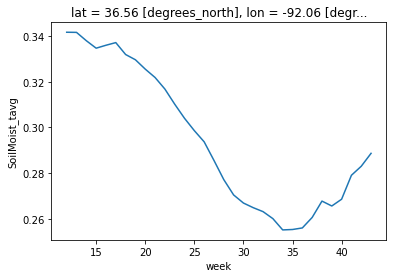

In [89]:
weekly_climatological_mean.plot()

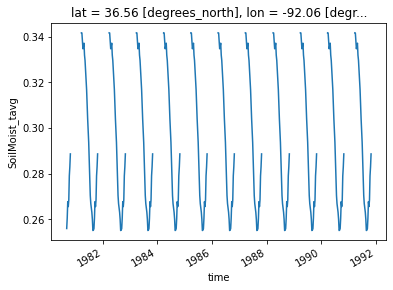

In [88]:
expanded_climatological_mean[0:600].plot()

In [131]:
#weekly_climatological_mean
#expanded_climatological_mean.values[0:600]
#soil_moisture_anomaly


In [103]:
#no_week_43 = SM5_US_point.where(SM5_US_point.time.dt.week != 43)

In [102]:
#no_week_43.sel(lon=-92.0625,lat=36.5625).values[0:600]
#SM5_US_point.sel(lon=-92.0625,lat=36.5625).values[0:600]

In [116]:
SM5_US_point[1937]
#k==59 or k==112 or k==164 or k==216 or k==268 or k==320 or k==372 or k==425 or k==477 or k==529 or k==581 or k==633 or k==686 or k==738 or k==790 or k==842 or k==894 or k==946 or k==999 or k==1051 or k==1103 or k==1155 or k==1207 or k==1260 or k==1312 or k==1364 or k==1416 or k==1468 or k==1520 or k==1573 or k==1625 or k==1677 or k==1729 or k==1781 or k==1833 or k==1886 or k==1937:


<xarray.DataArray 'SoilMoist_tavg' (lat: 224, lon: 464)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon      (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
    time     datetime64[ns] 2017-10-22
Attributes:
    grid_mapping:  spatial_ref

In [12]:
#true
#consecutive dry weeks function
def consecutive(da1):
    

    #first gegerate an array
    dates = pd.date_range(start='1980-09-07', end='2017-10-22', periods=1938) #freq='W'    #anyway add coords to pandas without xarray?  #maybe we can remove all additional week in leap years
    da1 = xr.DataArray(da1, coords=[dates], dims=['time'])
    #################da1 = da1.where(da1.time.dt.week != 53, drop=True)  #data_no_53rd_week 1939 to 1932
    da1 = da1.where(da1.time.dt.week != 43)  #Just put nan for week 43 since the value is extermely high and has no sense!

    fd = np.zeros(len(da1)-1+31)
    fd_DROUGHT = np.zeros(len(da1)-1+31)
    onset_drought = np.zeros(len(da1)-1+31)   #not sure 
    S = np.zeros(len(da1)-1+31)
    onset = np.zeros(len(da1)-1+31)
    onset_20 = np.zeros(len(da1)-1+31)
    #SM_q20 = np.nanquantile(da1, [0.20])
    #SM_q40 = np.nanquantile(da1, [0.40])
    
    
    
    #compute percentiles from climatology  #each year has 53 weeks!   #long runtime >3hrs
    #percentile_20 = np.zeros(52)
    #percentile_40 = np.zeros(52)
    #for i in range(52):
    #    week_data = da1.sel(time = da1['time.week'] == i+1)
    #    percentile_20[i] = np.percentile(week_data, 20)
    #    percentile_40[i] = np.percentile(week_data, 40)
        
    # Calculate the weekly climatological percentiles for the selected grid cell    
    percentile_20_climato = da1.groupby("time.week").quantile(0.2, dim="time")#.compute()
    percentile_40_climato = da1.groupby("time.week").quantile(0.4, dim="time")#.compute()

    #percentile_20 = percentile_20[0:52]
    #percentile_40 = percentile_40[0:52]
    
    #da = da1.values
    #percentile_20_climato = percentile_20_climato.values
    #percentile_40_climato = percentile_40_climato.values
    
    #repeat 52 climatological weeks
    #percentile_20 = np.repeat(percentile_20, 38)  #never use repeat becuase mess up nan!!!
    #percentile_20 = np.concatenate([percentile_20 for _ in range(38)])
    #percentile_20 = percentile_20[8*4+2:]     #removes 1980-01 to 1980-09   #becuase groupby strats from week one to week 52!
    ### as a result 31th index of percentile_20 is equal to first April 1981
    
    #percentile_40 = np.repeat(percentile_40, 38)  #never use repeat becuase mess up nan!!!
    #percentile_40 = np.concatenate([percentile_40 for _ in range(38)])
    #percentile_40 = percentile_40[8*4+2:]    #removes 1980-01 to 1980-09 
    ### as a result 31th index of percentile_20 is equal to first April 1981
    
    # Expand the weekly climatological percentiles to match the shape of the original data
    percentile_20_climato_exp = percentile_20_climato.sel(week=da1['time.week'])#, method='nearest')
    percentile_40_climato_exp = percentile_40_climato.sel(week=da1['time.week'])#, method='nearest')
    
   #Note weekly_climatological_exp is similar to the original data and no need to exclude 1-8 beginning months of 1980!!!    

    SM_q20 = percentile_20_climato_exp
    SM_q40 = percentile_40_climato_exp
    
    da = da1.values
    SM_q20 = SM_q20.values
    SM_q40 = SM_q40.values
    
    
    #first compute flash drought binary fd 
    for i in range(31,len(da1)-1):
        
        if da[i-2] <=  SM_q20[i-2] and da[i-1] <=  SM_q20[i-1] and da[i] <=  SM_q20[i]: #two weeks below 20 percentile!  #duration is at least 2 weeks 
            
            if da[i-3] >= SM_q40[i-3] or da[i-4] >= SM_q40[i-4] or da[i-5] >= SM_q40[i-5]:
                
                onset_20[i-2] = 1  #onset better than onset_20
                fd[i-2] = 1
                fd[i-1] = 1
                fd[i] = 1
                S[i-2] = da[i-2] - SM_q40[i-2]
                S[i-1] = da[i-1] - SM_q40[i-1]
                S[i] = da[i] - SM_q40[i]
                    
                ### #FD onset; exact time falls below 20% 
                ###if da[i-3] > SM_q40[i-3]:   #before it was SM_q20[i-3]
                ###    onset_20[i-2] = 1
                ###    fd[i-2] = 1
                ###    fd[i-1] = 1
                ###    fd[i] = 1
                ###    #S[i-2] = SM5_US_point_1979[i-2] - SM_q40
                ###    #S[i-1] = SM5_US_point_1979[i-1] - SM_q40
                ###    #S[i] = SM5_US_point_1979[i] - SM_q40
                ###
                ###    
                ###elif da[i-4] > SM_q40[i-4]:    #before it was SM_q20[i-4]
                ###    onset_20[i-3] = 1
                ###    fd[i-3] = 1
                ###    fd[i-2] = 1
                ###    fd[i-1] = 1
                ###   fd[i] = 1
                ###    #S[i-3] = SM5_US_point_1979[i-3] - SM_q40
                ###    #S[i-2] = SM5_US_point_1979[i-2] - SM_q40
                ###    #S[i-1] = SM5_US_point_1979[i-1] - SM_q40
                ###    #S[i] = SM5_US_point_1979[i] - SM_q40
                ###    
                ###else:
                ###    onset_20[i-4] = 1
                ###    fd[i-4] = 1
                ###    fd[i-3] = 1
                ###    fd[i-2] = 1
                ###    fd[i-1] = 1
                ###    fd[i] = 1
                ###    #S[i-4] = SM5_US_point_1979[i-4] - SM_q40
                ###    #S[i-3] = SM5_US_point_1979[i-3] - SM_q40
                ###    #S[i-2] = SM5_US_point_1979[i-2] - SM_q40
                ###    #S[i-1] = SM5_US_point_1979[i-1] - SM_q40
                ###    #S[i] = SM5_US_point_1979[i] - SM_q40
                    

                    
                #FD termination    
                for k in range(i+1,len(da1)-1):    #interesting no need to define end of growing season, fishiy a bit!
                    if da[k] < SM_q20[k]:
                        fd[k] = 1
                        S[k]= da[k] - SM_q40[k]
                        
                    else:
                        #fd[k] = 0    #it must be commented 
                        break
    
    #second compute duration 
    count = 0
    du = np.zeros(len(da1)-1+31)
    
    for i in range(31,len(da1)-2):
        
        if fd[i+1] > fd[i]:
            count=0
            onset[i+1]=1  #represnt frequency
            
            for k in range(i+2,len(da1)):
                if fd[k] == fd[k-1]:
                    count+=1
                    du[k-1]=0
                    du[k]=count
                    
                    if k == i+5:
                        onset_drought[i+5] = 1    #number of DROUGHT events (with duration >=5 weeks)   #recently added to calcluate how many percentage evended up with Drought 

                    
                    if k==59 or k==112 or k==164 or k==216 or k==268 or k==320 or k==372 or k==425 or k==477 or k==529 or k==581 or k==633 or k==686 or k==738 or k==790 or k==842 or k==894 or k==946 or k==999 or k==1051 or k==1103 or k==1155 or k==1207 or k==1260 or k==1312 or k==1364 or k==1416 or k==1468 or k==1520 or k==1573 or k==1625 or k==1677 or k==1729 or k==1781 or k==1833 or k==1886 or k==1937:
                        break
                        
                else:      #later add the condition related to the end of growing season! only very small reqion with dur=1
                    break
 
    
    #return (fd) 
    #return (du)   #output is a vector showing duration   
    #return onset
    #return onset_drought
    return S


In [13]:
Data = SM5_US_point
Data = Data.load()

#size = list(Data.shape)
#cdw = np.zeros(size)    #consequtive dry weeks

####Data1 = Data.where(Data.time.dt.week != 53, drop=True)   #data_no_53rd_week 1939 to 1932    #no worries on week 53 



In [14]:
%%time

#note that Data (53th weeks are not removed) is like SM5_US_point; so later inside the function 53th week is removed

#three_dim = xr.apply_ufunc(consecutive, Data, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
#duration = xr.apply_ufunc(consecutive, Data, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
#onset = xr.apply_ufunc(consecutive, Data, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
#onset_drought = xr.apply_ufunc(consecutive, Data, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
Severity = xr.apply_ufunc(consecutive, Data, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!


client

CPU times: user 2h 59min 28s, sys: 25 s, total: 2h 59min 54s
Wall time: 3h 4min 40s


<Client: 'tcp://10.12.206.64:44044' processes=1 threads=1, memory=93.13 GiB>

In [15]:
#here

Data1 = Data 

lat = np.linspace(25.0625, 52.9375 , num=224)
lon = np.linspace(-124.9375, -67.0625 , num=464)

#binary = xr.DataArray(data=three_dim.isel(time=slice(0,three_dim.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,Data1.time])
#binary.to_netcdf('/glade/work/afallah/data/binary_OL_198009_new_way_weekly_clima_percentiles10_edited2.nc', mode='w')  

#binary_dur = xr.DataArray(data=duration.isel(time=slice(0,duration.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,Data1.time])
#binary_dur.to_netcdf('/glade/work/afallah/data/binary_dur_OL_198009_new_way_weekly_clima_percentiles10_edited2.nc', mode='w')

#binary_onset = xr.DataArray(data=onset.isel(time=slice(0,onset.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,Data1.time])
#binary_onset.to_netcdf('/glade/work/afallah/data/binary_onset_OL_198009_new_way_weekly_clima_percentiles10_edited2.nc', mode='w')

#binary_onset_drought = xr.DataArray(data=onset_drought.isel(time=slice(0,onset_drought.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,Data1.time])
#binary_onset_drought.to_netcdf('/glade/work/afallah/data/binary_onset_drought_OL_198009_new_way_weekly_clima_percentiles10_edited2.nc', mode='w')

binary_sev = xr.DataArray(data=Severity.isel(time=slice(0,Severity.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,Data1.time])
binary_sev.to_netcdf('/glade/work/afallah/data/binary_sev_OL_198009_new_way_weekly_clima_percentiles10_edited2.nc', mode='w')


In [ ]:
binary=xr.open_dataset('/glade/work/afallah/data/binary_DA_198009_new_way_weekly_clima_percentiles10.nc')    #xr.open_dataarray


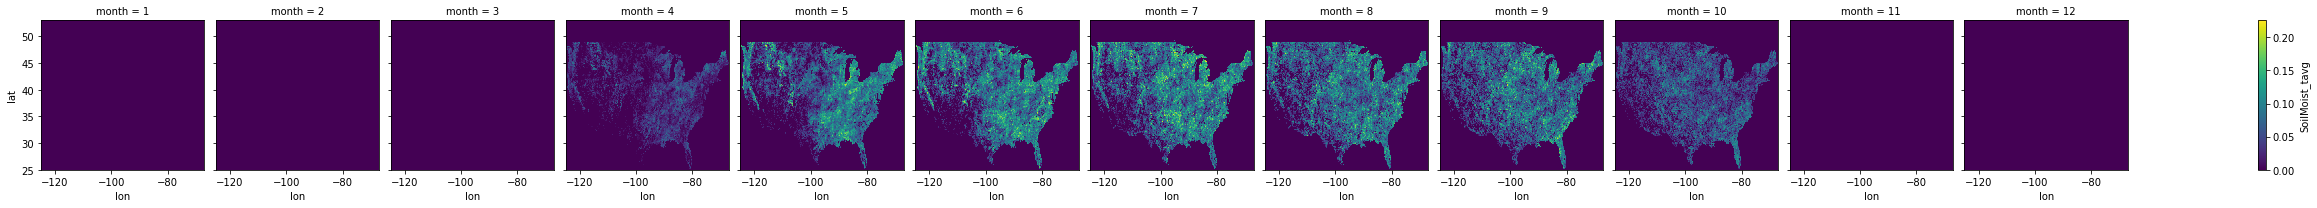

In [14]:
binary.groupby('time.month').mean('time').plot(col="month")

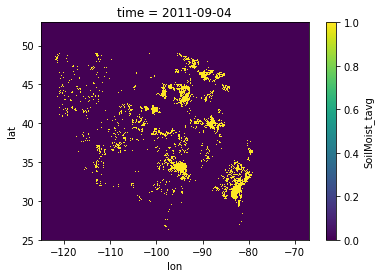

In [9]:
binary.sel(time='2011-09-04').plot()

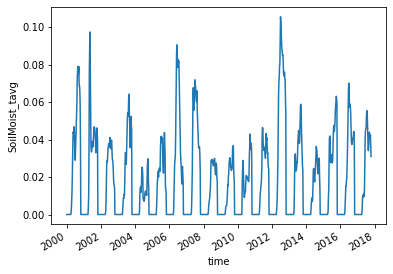

In [11]:
#new
binary.sel(time=slice('2000-01-01','2017-10-20')).mean(dim=('lat','lon')).plot()

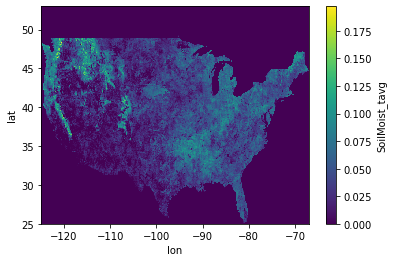

In [15]:
binary.SoilMoist_tavg.mean('time').plot()

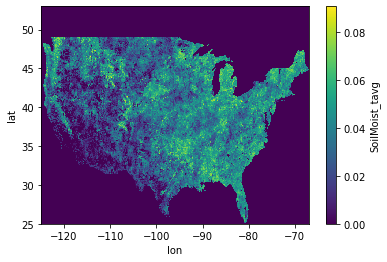

In [10]:
binary.mean('time').plot()    #new

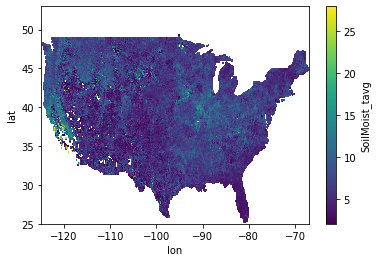

In [34]:
binary_dur = binary_dur.where(binary_dur !=0)
binary_dur.mean('time').plot()

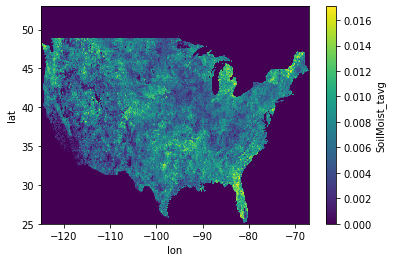

In [61]:
binary_onset_20.mean('time').plot()

In [32]:
binary_dur1.min()

<xarray.DataArray 'SoilMoist_tavg' ()>
array(2.)

In [ ]:
#%%time
##for i,yr in enumerate(years):
#for a in np.arange(cdw.shape[1]):
#    for b in np.arange(cdw.shape[2]):
#        cdw[:,a,b] = consecutive(Data[:,a,b].values)    #.values
#            
#            
#            
#client
##Data.isel(time=wk, lat=a, lon=b).values            

In [ ]:
##cdw Data Array
#new_cdw = xr.DataArray(data=cdw, 
#                       dims=list(Data.dims),
#                       coords=dict(
#                           lon=Data.lon,
#                           lat=Data.lat,
#                           time=Data.time,
#                       ),
#                       name='cdw',
#                       attrs=dict(
#                           description="consecutive dry weeks",
#                           units="weeks",
#                       ),
#                      )

In [14]:
#DO NOT REMOVE!
#compute 20th percentiles/
percentile_20 = SM5_US_point.groupby("time.week").quantile(0.2, dim="time")  
percentile_40 = SM5_US_point.groupby("time.week").quantile(0.4, dim="time")  

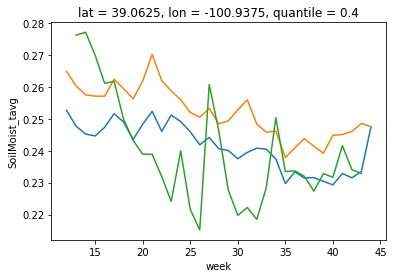

In [54]:
percentile_20.sel(lat = 39.0625, lon=-100.9375).plot()
percentile_40.sel(lat = 39.0625, lon=-100.9375).plot()

y= SM5_US_point.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)


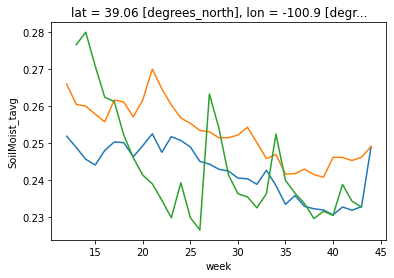

In [15]:
#new
percentile_20.sel(lat = 39.0625, lon=-100.9375).plot()
percentile_40.sel(lat = 39.0625, lon=-100.9375).plot()

y= SM5_US_point.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)


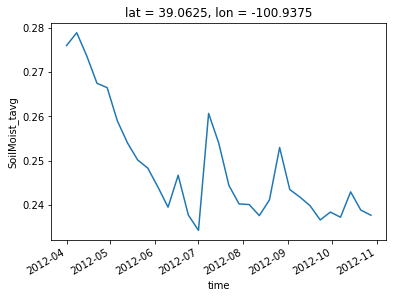

In [21]:
y= SM5_US_point.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31"))
y.plot()

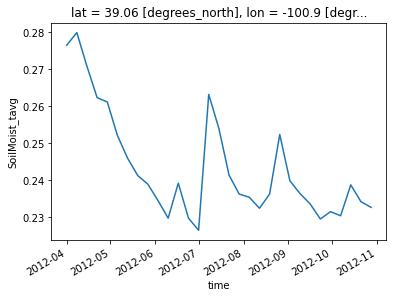

In [10]:
#new
y= SM5_US_point.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31"))
y.plot()

In [47]:
#binary.SoilMoist_tavg.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()
binary_dur.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        7., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])
Coordinates:
    lat      float64 39.06
    lon      float64 -100.9
  * time     (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30

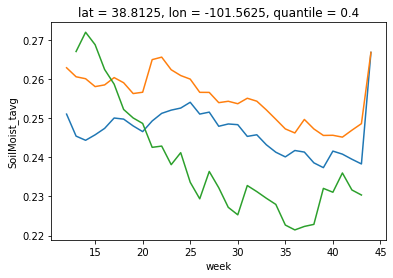

In [26]:
#test
percentile_20.sel(lon=-100.9375-5*.125,lat=39.0625-2*.125).plot()
percentile_40.sel(lon=-100.9375-5*.125,lat=39.0625-2*.125).plot()

y= SM5_US_point.sel(lon=-100.9375-5*.125,lat=39.0625-2*.125).sel(time=slice("2012-01-01","2012-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)



In [50]:
#test
#binary.sel(lon=-100.9375-5*.125,lat=39.0625-2*.125).sel(time=slice("2012-01-01","2012-12-31")).plot()
binary_dur.sel(lon=-100.9375-5*.125,lat=39.0625-2*.125).sel(time=slice("2012-01-01","2012-12-31"))


<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 23., nan, nan, nan, nan, nan, nan, nan, nan,
       nan])
Coordinates:
    lat      float64 38.81
    lon      float64 -101.6
  * time     (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30

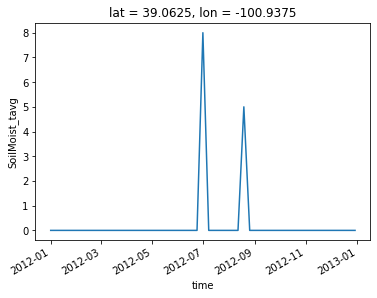

In [27]:
binary_dur.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()

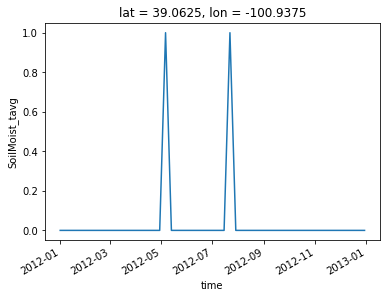

In [62]:
binary_onset_20.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()

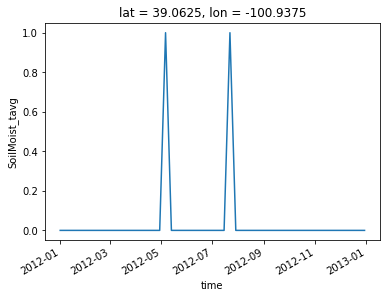

In [16]:
binary_onset.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()

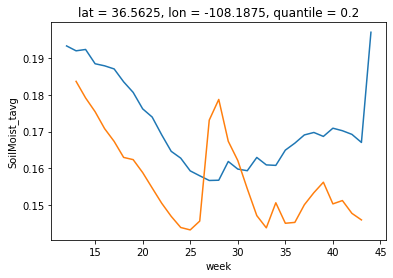

In [55]:
percentile_20.sel(lat = 36.5625, lon=-108.1875).plot()
y= SM5_US_point.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)

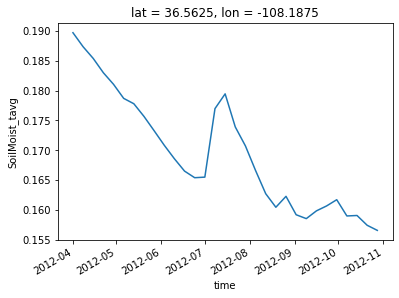

In [17]:
y= SM5_US_point.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))
y.plot()

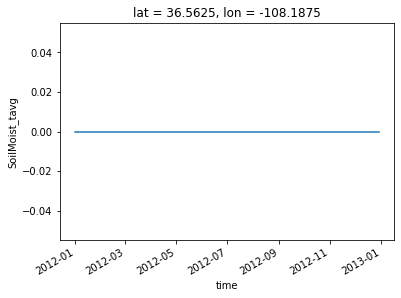

In [16]:
binary.SoilMoist_tavg.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

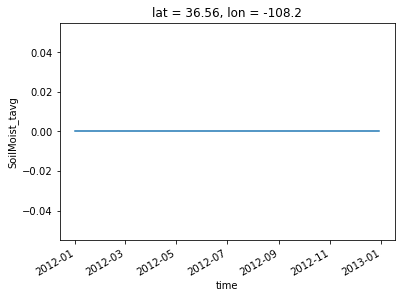

In [11]:
#new
binary.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()


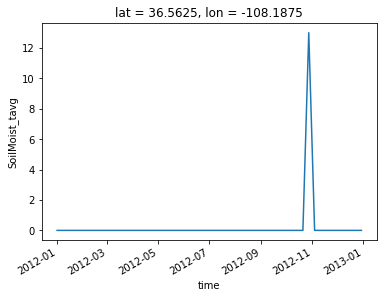

In [28]:
binary_dur.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()


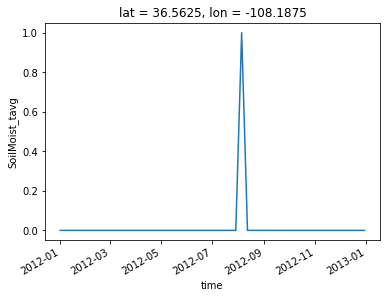

In [63]:
binary_onset_20.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()


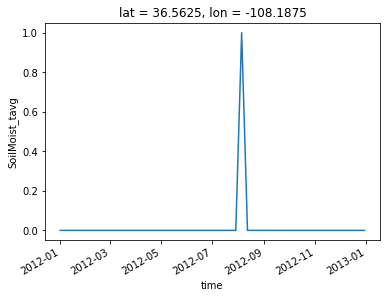

In [17]:
binary_onset.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()


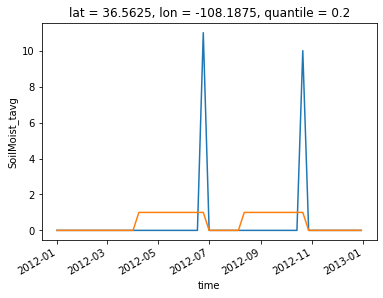

In [13]:
new_cdw.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()
window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

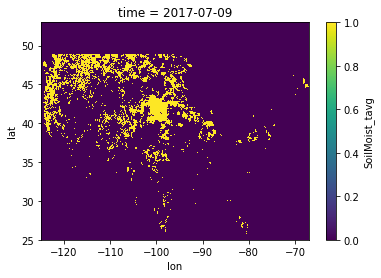

In [13]:
binary.SoilMoist_tavg.sel(time="2017-07-09").plot()

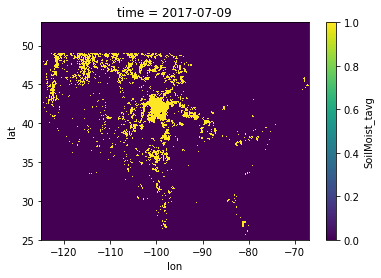

In [12]:
#new
binary.sel(time="2017-07-09").plot()

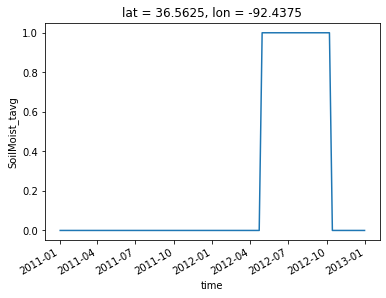

In [16]:
binary.SoilMoist_tavg.sel(lon=-92.4375,lat=36.5625).sel(time=slice("2011-01-01","2012-12-31")).plot()   


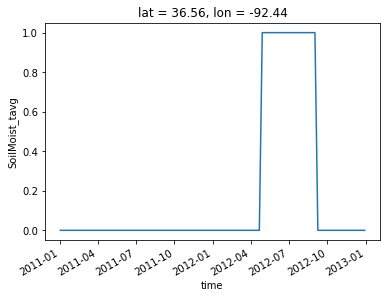

In [13]:
#new
binary.sel(lon=-92.4375,lat=36.5625).sel(time=slice("2011-01-01","2012-12-31")).plot()   


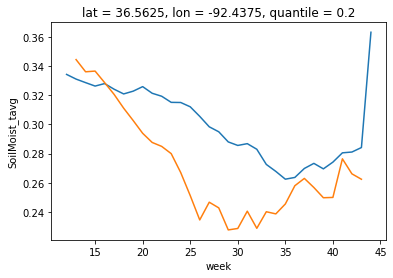

In [50]:
percentile_20.sel(lon=-92.4375,lat=36.5625).plot()

y= SM5_US_point.sel(lon=-92.4375,lat=36.5625).sel(time=slice("2012-01-01","2012-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)

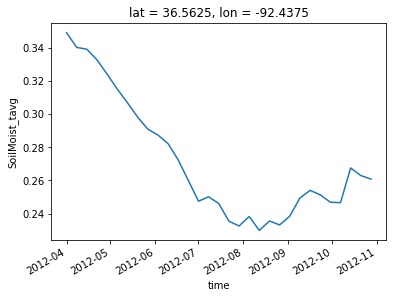

In [19]:
y= SM5_US_point.sel(lon=-92.4375,lat=36.5625).sel(time=slice("2012-01-01","2012-12-31"))
y.plot()

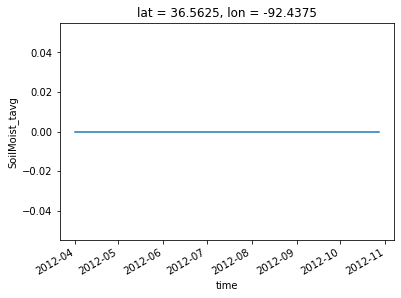

In [18]:
binary.SoilMoist_tavg.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot()


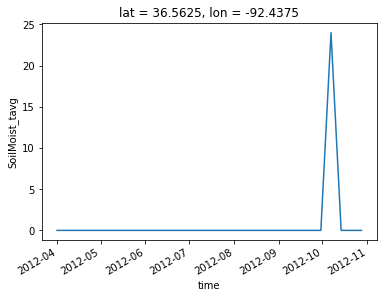

In [29]:
binary_dur.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot()


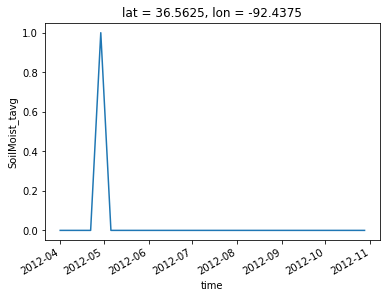

In [64]:
binary_onset_20.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot()


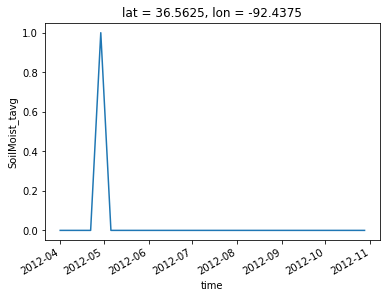

In [18]:
binary_onset.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot()


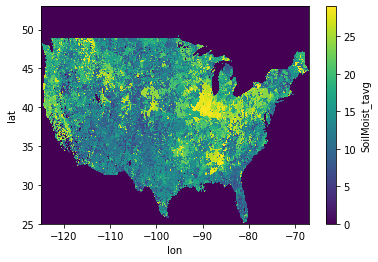

In [30]:
binary_dur.max('time').plot()

In [50]:

from scipy.ndimage.measurements import label

# Load the data
data = SM5_US_point

# Define the precipitation threshold
#threshold = 0.25  # mm/day

# Determine wet and dry periods
#dry_periods = data < threshold

# Convert wet and dry periods to integer arrays
#dry_periods_int = dry_periods.astype(int)
dry_periods_int = below_20
wet_periods_int = above_40

# Find consecutive wet and dry periods using scipy's label function
_, dry_spell_labels = label(dry_periods_int)
_, wet_spell_labels = label(wet_periods_int)

# Calculate the duration of each wet and dry spell
dry_spell_lengths = xr.DataArray(label(dry_periods_int)[0], coords=dry_periods_int.coords, dims=dry_periods_int.dims)
wet_spell_lengths = xr.DataArray(label(wet_periods_int)[0], coords=wet_periods_int.coords, dims=wet_periods_int.dims)

# Example analysis: average duration of wet and dry spells
avg_dry_spell = dry_spell_lengths.mean(dim='time')
avg_wet_spell = wet_spell_lengths.mean(dim='time')

print("Average duration of dry spells:", avg_dry_spell)
print("Average duration of wet spells:", avg_wet_spell)

Average duration of dry spells: <xarray.DataArray (lat: 224, lon: 464)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat       (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon       (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
    quantile  float64 0.2
Average duration of wet spells: <xarray.DataArray (lat: 224, lon: 464)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat       (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon       (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06


In [49]:
percentile_40 = SM5_US_point.shift(time=3).groupby("time.week").quantile(0.4, dim="time")  
temp = SM5_US_point.shift(time=3).groupby('time.week')
above_40_shifted = temp > percentile_40


In [50]:
# Mask the dry spell lengths based on the prior wet spell threshold
mask = above_40_shifted
masked_dry_spell_lengths = dry_spell_lengths.where(mask)

# Example analysis: average duration of dry spells with the specified prior wet spell condition
avg_dry_spell = masked_dry_spell_lengths.mean(dim='time')

print("Average duration of dry spells with prior wet spell above the 40th percentiles:", avg_dry_spell)

Average duration of dry spells with prior wet spell above the 40th percentiles: <xarray.DataArray (lat: 224, lon: 464)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat       (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon       (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
    quantile  float64 0.4


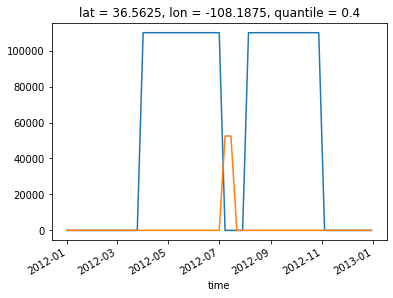

In [53]:
dry_spell_lengths.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()
wet_spell_lengths.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

In [56]:
dry_spell_lengths.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray (time: 53)>
array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 109956, 109956, 109956,
       109956, 109956, 109956, 109956, 109956, 109956, 109956, 109956,
       109956, 109956, 109956,      0,      0,      0,      0, 109956,
       109956, 109956, 109956, 109956, 109956, 109956, 109956, 109956,
       109956, 109956, 109956, 109956,      0,      0,      0,      0,
            0,      0,      0,      0,      0], dtype=int32)
Coordinates:
    lat      float64 36.56
    lon      float64 -108.2
  * time     (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30

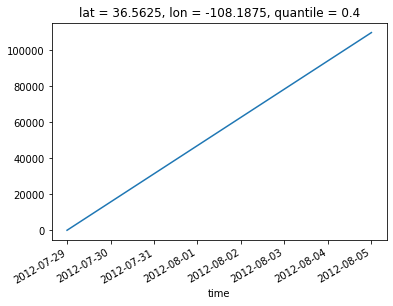

In [51]:
masked_dry_spell_lengths.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

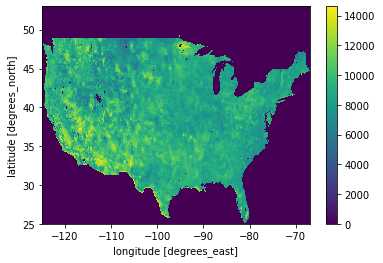

In [42]:
avg_dry_spell.plot()

In [40]:
percentile_40_shifted = SM5_US_point.shift(time=3).groupby("time.week").quantile(0.4, dim="time")  
temp_shifted = SM5_US_point.shift(time=3).groupby('time.week')
above_40_shifted = temp_shifted > percentile_40_shifted


In [41]:
temp = SM5_US_point.groupby('time.week')
below_20 = temp < percentile_20
#above_40 = temp > percentile_40

In [42]:


below_20th_mask = below_20
above_40th_mask = above_40_shifted

# Calculate the rolling window size for the condition checks
window_size = 3

# Calculate the duration of flash drought events
#drought_duration = (below_20th_mask.rolling(time=window_size).sum() == window_size) & above_40th_mask

# Find the starting position of each flash drought event
drought_start = xr.ufuncs.logical_and(
    above_40th_mask.rolling(time=window_size).sum() >= 1,
    below_20th_mask.rolling(time=window_size).sum() == window_size
)

In [43]:
# Find the ending position of each flash drought event
drought_end = below_20th_mask.rolling(time=window_size).sum() == 0

# Mark the end of the growing season as October 20th
end_of_growing_season = SM5_US_point.time.dt.dayofyear >= 293  # October 20th is the 293rd day of the year

# Combine the conditions to determine the end of flash drought events
flash_drought_end = xr.ufuncs.logical_or(drought_end, end_of_growing_season)


# Calculate the duration of each flash drought event
flash_drought_duration = below_20th_mask.copy()

In [46]:
# Find the ending position of each flash drought event
drought_end = below_20th_mask.rolling(time=window_size).sum() == 0

# Mark the end of the growing season as October 20th
end_of_growing_season = SM5_US_point.time.dt.dayofyear >= 293  # October 20th is the 293rd day of the year

# Combine the conditions to determine the end of flash drought events
flash_drought_end = xr.ufuncs.logical_or(drought_end, end_of_growing_season)


# Calculate the duration of each flash drought event
flash_drought_duration = below_20th_mask.copy()
flash_drought_duration = flash_drought_duration.where(drought_start, 0)
flash_drought_duration = flash_drought_duration.cumsum(dim='time')

#flash_drought_duration = flash_drought_duration.where(~flash_drought_end, 0)




In [47]:
##flash_drought_end = flash_drought_end.where(flash_drought_duration, 0)        #added recently   ~

#flash_drought_duration = flash_drought_duration.where(~flash_drought_end, 0)
##diff = flash_drought_duration.diff(dim='time')
##flash_drought_duration = flash_drought_duration[1:1939].where(diff==0, 0)


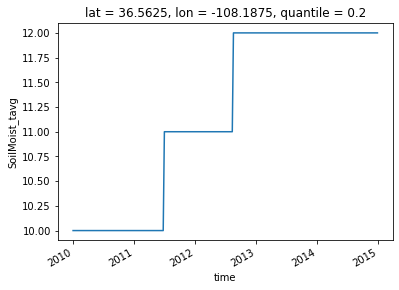

In [48]:
flash_drought_duration.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2010-01-01","2014-12-31")).plot()
#dur.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2014-12-31")).plot()


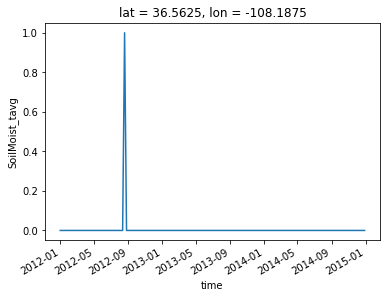

In [49]:
drought_start.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2014-12-31")).plot()

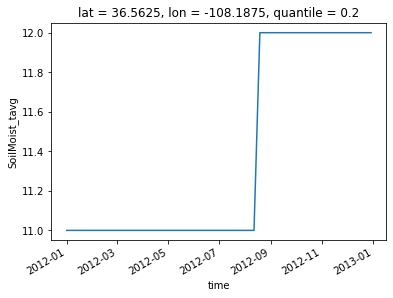

In [34]:
#drought_start.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

#drought_start.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()   #note for onset, it need to be chnaged to only one spike! 

#drought_event_duration.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()
drought_event_duration.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

#flash_drought_events.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()
#flash_drought_events.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

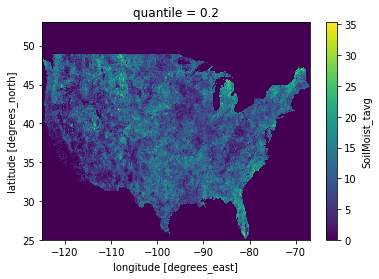

In [143]:
drought_event_duration.mean('time').plot()

In [9]:
diff = window_1_bool.diff(dim='time')
one = xr.ones_like(window_1_bool[1:1937])

# Create a variable with the time index as values
time_var = xr.DataArray(np.arange(len(one.time)), dims=['time'])
time_var_3d = time_var.broadcast_like(one)


start = time_var_3d.where((diff == 1), other=0)
end = time_var_3d.where((diff == -1), other=0)


In [18]:
start_end = start + end

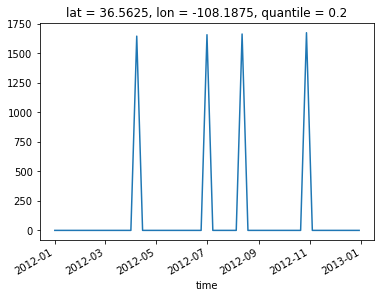

In [19]:
start_end.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

In [32]:
a = start.where(start !=0)
b = end.where(end !=0)
c = xr.align(a, b, join='exact')


In [66]:
result.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray 'SoilMoist_tavg' (time: 33)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  0.,  0.,  0.,  1., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 2012-04-15 2012-04-22 ... 2012-11-25
    lat      float64 36.56
    lon      float64 -108.2
    week     (time) int64 15 16 17 18 19 20 21 22 23 ... 40 41 42 43 44 45 46 47

In [9]:
#number of flash droughts 

one_per_week = xr.ones_like(window_2_bool)   #like the shorter one
FD_weeks = one_per_week.where((window_1_bool[3:1937] ==1) & (window_2_bool ==1) , other=0)    #FD_weeks only used for caculating number_FD!!!  #window_2_bool.shift(time=-3) happens in reality but if we shift it back, we cannot see the crossing 

number_FD = (FD_weeks.diff('time') ==1).astype(int)
#num_changes = len(FD_weeks.where(FD_weeks == 1))


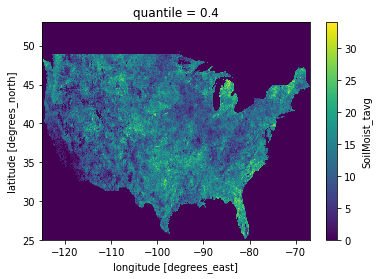

In [10]:
#total number of flash droughts 
number_FD.sum(dim="time").plot()

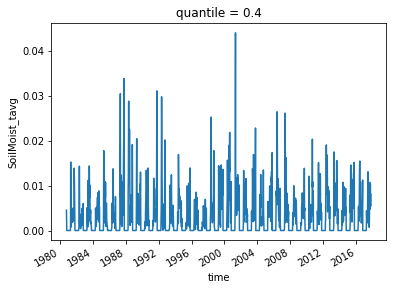

In [63]:
number_FD.mean(dim=('lat','lon')).plot()  #needs weighting 

In [119]:
# Calculate the 20th and 40th percentiles for each week across the 5-year period
data = SM5_US_point
# Convert the week dimension to a regular numerical index
percentiles = percentiles.assign_coords(week=range(1, 54))

# Remove the 'week' coordinate to make it a 2D DataArray
percentiles = percentiles.reset_coords(['week'], drop=True)

# Create a mask for temperatures above the 40th percentile and consecutive weeks below the 20th percentile
mask = (data > percentiles.sel(quantile=0.4)) & (data.shift(time=1) < percentiles.sel(quantile=0.2))

# Find the consecutive weeks below the 20th percentile for each location
consecutive_weeks = np.zeros_like(data[0, :, :])  # Initialize an array to store the number of consecutive weeks
weeks_below_20th_percentile = []  # Initialize a list to store the consecutive weeks below the 20th percentile

for i in range(1, data.time.size):
    consecutive_weeks = np.where(mask[i], consecutive_weeks + 1, 0)
    if consecutive_weeks.min() >= 3:
        weeks_below_20th_percentile.append(i)

# Convert the week indices to actual week numbers
weeks_below_20th_percentile = [week % 53 + 1 for week in weeks_below_20th_percentile]







ValueError: cannot remove index coordinates with reset_coords: {'week'}

In [84]:
ds = SM5_US_point

In [107]:
consecutive_below_p20 = (below_20.rolling(time=3).sum() == 3) & (above_40.shift(time=2).rolling(time=3).sum() == 3)

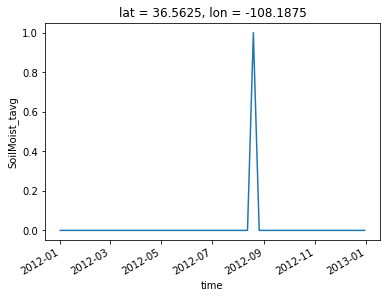

In [108]:
consecutive_below_p20.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

In [118]:
percentiles = ds.groupby('time.week').quantile(q=[0.2, 0.4], dim=['time'])


In [88]:
weekly_percentiles = percentiles

In [91]:

# Calculate consecutive weeks below the 20th percentile using rolling
#consecutive_weeks = weekly_percentiles.sel(quantile=0.2).rolling(time=3).apply(lambda x: (x[0] > weekly_percentiles.sel(quantile=0.4).isel(time=weekly_percentiles.time == x.name[0])).all() and (x[-1] < weekly_percentiles.sel(quantile=0.2).isel(time=weekly_percentiles.time == x.name[-1])).all(), raw=True)



In [53]:

# Open ERA5 weekly temperatures for 5 years
ds = SM5_US_point

# Calculate the 20th and 40th percentiles for each individual week across the entire year
p20 = percentile_20
p40 = percentile_40

# Find the consecutive weeks below the 20th percentile only if temperature declines from above the 40th percentile to below the 20th percentile within at most 3 weeks
# Use rolling to create a window of 3 weeks
window = ds.rolling(time=3, center=True)


In [54]:


# Define a function to check the condition
def check_condition(x):
    # Check if the first value is above the 40th percentile
    if x[0] > p40.sel(week=x.time[0].dt.week):
        # Check if the last value is below the 20th percentile
        if x[-1] < p20.sel(week=x.time[-1].dt.week):
            # Return True if the condition is met
            return True
    # Return False otherwise
    return False

# Apply the function to the window and get a boolean mask
mask = window.reduce(check_condition)

# Filter the dataset using the mask
result = ds.where(mask, drop=True)

# Print the result
print(result)


TypeError: check_condition() got an unexpected keyword argument 'axis'

In [78]:
window = ds.rolling(time=3, center=True)
x = window
if x[0] > p40.sel(week=x.time[0].dt.week):
    print('F')

TypeError: 'DataArrayRolling' object is not subscriptable

In [ ]:
def test(df):
    return np.mean(df)
tmp.rolling(window=5,center=False).apply(lambda x: test(x))

zscore = lambda x: (x[-1] - x.mean()) / x.std(ddof=1)   #current rolling data pointx[-1]  x.values[-1] 


In [41]:

# Calculate the percentiles
p20 = percentile_20
p40 = percentile_40

# Create the rolling windows
window1 = SM5_US_point.rolling(time=3).construct('window').isel(window=0)
window2 = SM5_US_point.rolling(time=3).construct('window').isel(window=1)

# Check if the conditions are met
cond1 = window1 > p40.sel(week=window1.time.dt.week)
cond2 = window2 < p20.sel(week=window2.time.dt.week)

# Combine the conditions
output = (cond1.any(dim='time') & cond2.all(dim='time')).astype(int)

print(output)


<xarray.DataArray 'SoilMoist_tavg' (lat: 224, lon: 464)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon      (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06


In [52]:

# Calculate the percentiles
p20 = percentile_20
p40 = percentile_40

# Create the rolling windows
window1 = SM5_US_point.rolling(time=3).construct('window').isel(window=0)
window2 = SM5_US_point.rolling(time=3).construct('window').isel(window=1)

# Check if the conditions are met
cond1 = window1 > p40.sel(week=window1.time.dt.week)
cond2 = window2 < p20.sel(week=window2.time.dt.week)

# Combine the conditions
#output = (cond1.isel(window=0).any(dim='window') & cond2.isel(window=1).all(dim='window')).astype(int)

#print(output)


In [ ]:
output = (cond1.any(dim='time') & cond2.all(dim='time')).astype(int)


In [62]:


# Open the ERA5 weekly temperature dataset
ds = SM5_US_point

# Calculate the 20th and 40th percentiles for each week across 5 years
percentiles = ds.groupby('time.week').reduce(np.percentile, dim='time', q=[20, 40])

# Use rolling with window size 3 to find weeks with temperature below the 20th percentile
below_20th = ds.rolling(time=3).construct('window').where(ds < percentiles.sel(quantile=20), drop=True)

# Find weeks where temperature was above the 40th percentile three weeks ago
above_40th = ds.shift(time=3).where(ds > percentiles.sel(quantile=40), drop=True)

# Combine the two conditions to find weeks where temperature is below the 20th percentile and was above the 40th percentile three weeks ago
result = below_20th.where(above_40th, drop=True)


ValueError: dimensions ('lat', 'lon') must have the same length as the number of data dimensions, ndim=3

In [ ]:
data.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

In [60]:
# Output the weeks below the 20th percentile if any of three weeks ago the percentile was above the 40th percentile
weeks_below_p20 = output.where(window1.time.dt.week == (window2.time.dt.week - 3)).where(output == 1)

print(weeks_below_p20)

<xarray.DataArray 'SoilMoist_tavg' (time: 1939, lat: 224, lon: 464)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat       (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon       (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * time      (time) datetime64[ns] 1980-09-07 1980-09-14 ... 2017-10-29
    quantile  float64 0.4
    week      (time) int64 36 37 38 39 40 41 42 43 ... 36 37 38 39 40 41 42 43

In [38]:
condition1 = (cond1.isel(window=0).all(dim='time')).astype(int)

In [39]:
condition1.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

ValueError: dimensions or multi-index levels ['time'] do not exist

In [12]:
temp = SM5_US_point.groupby('time.week')
below_20 = temp < percentile_20
cond1 = below_20.rolling(time=3, min_periods=3, center=True).construct('window').isel(window=0)
#cond1 = consecutive_weeks.all(dim='window').astype(int)   #time:1937


above_40 = temp > percentile_40
cond2 = above_40.rolling(time=3, min_periods=3, center=True).construct('window').isel(window=1)   #note above_40 not shifted here!
#cond2 = three_weeks_earlier.any(dim='window').astype(int)    #time:1934 start late since shifted 

# Combine the conditions
output = (cond1.any(dim='time') & cond2.all(dim='time')).astype(int)


TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [ ]:
output

In [130]:
temp = SM5_US_point.groupby('time.week')

SM5_US_point_shd = SM5_US_point.shift(time=-1)
temp_shd = SM5_US_point_shd.groupby('time.week')
percentile_20_shd = temp_shd.quantile(0.2, dim="time")  
below_20_1 = temp_shd < percentile_20_shd

SM5_US_point_shd = SM5_US_point.shift(time=-2)
temp_shd = SM5_US_point_shd.groupby('time.week')
percentile_40_shd = temp_shd.quantile(0.4, dim="time")  
above_40_2 = temp_shd > percentile_40_shd

In [131]:
low_percentile = ((below_20) & (below_20_1) & (above_40_2))#.any(dim='time')


In [132]:
exclude_above_p40 = temp_shd <= percentile_40_shd
final_bool = low_percentile & exclude_above_p40

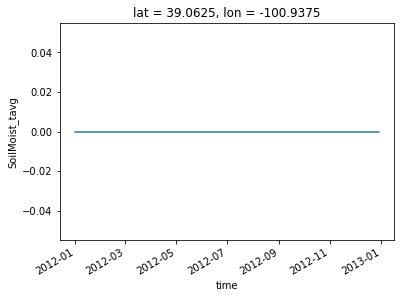

In [135]:
low_percentile.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()
#final_bool.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()

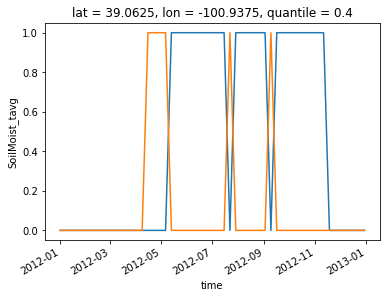

In [134]:
exclude_above_p40.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()
above_40_2.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()

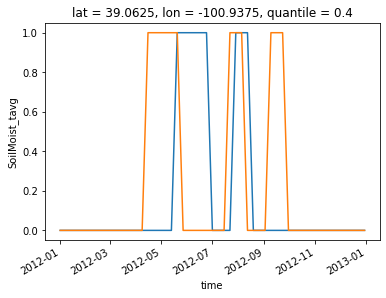

In [34]:
window_1_bool
window_2_bool.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()   #.shift(time=-3) happens in reality but if we shift it back, we cannot see the crossing 


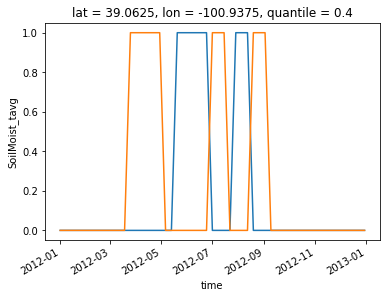

In [35]:
window_1_bool.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()
window_2_bool.shift(time=-3).sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()   #.shift(time=-3) happens in reality 


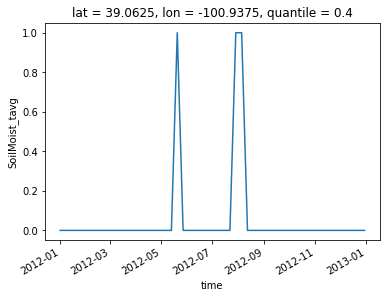

In [11]:
FD_weeks.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()


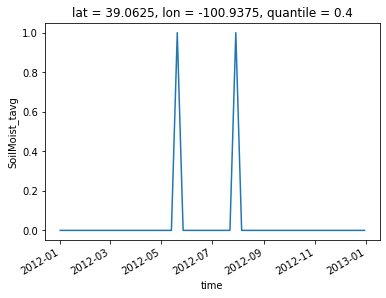

In [37]:
number_FD.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()


In [11]:
#FD_weeks.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()
#FD_weeks.sel(lat = 36.5625, lon=-92.0625).sel(time=slice("2012-01-01","2012-12-31")).plot()
#FD_weeks.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()

#number_FD.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()
#FD_weeks.where(FD_weeks.diff('time') ==1).sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()
#window_1_bool.diff('time').sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

#example calcuating the % of time or duration; only based on the first condition 
#window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

change  = window_1_bool.diff(dim='time') == True    #only shows the onset not ending!
num_changes = change.rolling(time=2).sum().where(change)
num_changes.dropna(dim='time')
#num_changes.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

<xarray.DataArray 'SoilMoist_tavg' (time: 0, lat: 224, lon: 464)>
array([], shape=(0, 224, 464), dtype=float64)
Coordinates:
  * lat       (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon       (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * time      (time) datetime64[ns] 
    quantile  float64 0.2
    week      (time) int64

In [11]:
w1 = window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))
w1

<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
    lat       float64 36.56
    lon       float64 -108.2
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    quantile  float64 0.2
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

In [12]:
a = (w1 ==1).cumsum()#.count()
a.where(a != a.shift(time=1))

<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       nan, nan, nan, nan, nan, nan, 13., 14., 15., 16., 17., 18., 19.,
       20., 21., 22., 23., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])
Coordinates:
    lat       float64 36.56
    lon       float64 -108.2
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    quantile  float64 0.2
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

In [13]:
diff = w1.diff(dim='time')
start = np.where(diff == 1)
end = np.where(diff == -1)


length = end[0] - start[0] #+ 1
length

array([12, 11])

In [34]:
diff = window_1_bool.diff(dim='time')
one = xr.ones_like(window_1_bool[1:1937])

# Create a variable with the time index as values
time_var = xr.DataArray(np.arange(len(one.time)), dims=['time'])
time_var_3d = time_var.broadcast_like(one)


start = time_var_3d.where((diff == 1), other=0)
end = time_var_3d.where((diff == -1), other=0)


In [79]:
#combines start and end 
start_end = start + end


In [124]:
start2 = time_var_3d.where((diff == 1), drop=True).astype(int)
start3 = start2.where(start2 > 0)
start3.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray (time: 29)>
array([1646.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
       1664.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan])
Coordinates:
  * time      (time) datetime64[ns] 2012-04-08 2012-04-15 ... 2012-10-21
    lat       float64 36.56
    lon       float64 -108.2
    quantile  float64 0.2
    week      (time) int64 14 15 16 17 18 19 20 21 ... 35 36 37 38 39 40 41 42

In [13]:
start_end.where(start_end !=0).dropna(dim="time",how="any").diff(dim='time').sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray (time: 0)>
array([], dtype=float64)
Coordinates:
  * time      (time) datetime64[ns] 
    lat       float64 36.56
    lon       float64 -108.2
    quantile  float64 0.2
    week      (time) int64

In [14]:
c = start_end.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))
c

<xarray.DataArray (time: 53)>
array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1646,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 1658,    0,    0,    0,    0,    0, 1664,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1675,
          0,    0,    0,    0,    0,    0,    0,    0,    0])
Coordinates:
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    lat       float64 36.56
    lon       float64 -108.2
    quantile  float64 0.2
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

In [41]:
flash_drought_event_duration = (end.where(end!=0) - start.where(start!=0))


In [43]:
#flash_drought_event_duration.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))


In [ ]:
#stacked2 = stacked[::2]   #two by two selected


In [117]:
da = start.where(start !=0)
#da.fillna(np.inf).argmin(dim='time')


In [101]:
da1 = da.where(~np.isnan(da), drop=True)


In [102]:
da1.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray (time: 29)>
array([1646.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
       1664.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan])
Coordinates:
  * time      (time) datetime64[ns] 2012-04-08 2012-04-15 ... 2012-10-21
    lat       float64 36.56
    lon       float64 -108.2
    quantile  float64 0.2
    week      (time) int64 14 15 16 17 18 19 20 21 ... 35 36 37 38 39 40 41 42

In [109]:
da = start.where(start !=0)

data = da
# Assuming the time dimension is named 'time', you can select it using the `.isel` method
time = data['time']

# Find the indices of NaN values in the time dimension
nan_indices = np.isnan(time)

# Roll the time dimension to shift NaN values to the end
time_shifted = time.roll(time=np.sum(nan_indices))

# Reindex the data array using the shifted time dimension
data_shifted = data.reindex(time=time_shifted)

# Print the resulting data array
print(data_shifted)

<xarray.DataArray (time: 1936, lat: 224, lon: 464)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., na

In [116]:
data_shifted.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray (time: 53)>
array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan, 1646.,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan, 1664.,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan])
Coordinates:
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    lat       float64 36.56
    lon       float64 -108.2
    quantile  float64 0.2
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

In [17]:
c.where(c!=0).dropna(dim="time", how="any").diff(dim='time')

<xarray.DataArray (time: 3)>
array([12.,  6., 11.])
Coordinates:
  * time      (time) datetime64[ns] 2012-07-01 2012-08-12 2012-10-28
    lat       float64 36.56
    lon       float64 -108.2
    quantile  float64 0.2
    week      (time) int64 26 32 43

In [16]:
# Compute the pairwise temperature differences
cc = c.where(c!=0).dropna(dim="time", how="any")
temp_pairwise_diff = cc.rolling(time=2, min_periods=2, center=True)


In [ ]:
s = start.where(start!=0).dropna(dim="time", how="any")
e = end.where(end!=0).dropna(dim="time", how="any")


In [27]:
s = start.where(start!=0)
s_avaible = s.notnull()

In [37]:
s = start.where(start!=0)
s.where(s.notnull(), drop=True).sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray (time: 29)>
array([1646.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
       1664.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan])
Coordinates:
  * time      (time) datetime64[ns] 2012-04-08 2012-04-15 ... 2012-10-21
    lat       float64 36.56
    lon       float64 -108.2
    quantile  float64 0.2
    week      (time) int64 14 15 16 17 18 19 20 21 ... 35 36 37 38 39 40 41 42

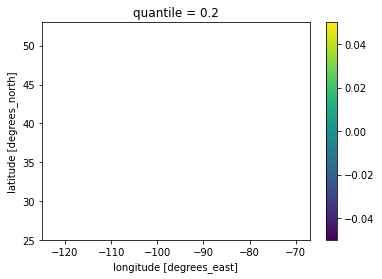

In [449]:
length = start_end.where(start_end!=0).dropna(dim="time", how="any").diff(dim='time')
length.mean('time').plot()

In [351]:
a = start.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

In [352]:
b = end.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

In [353]:
b-a

<xarray.DataArray (time: 53)>
array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0, -1646,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,  1658,
           0,     0,     0,     0,     0, -1664,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,  1675,     0,
           0,     0,     0,     0,     0,     0,     0,     0])
Coordinates:
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    lat       float64 36.56
    lon       float64 -108.2
    quantile  float64 0.2
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

In [100]:
#w1.diff(dim='time') == 1

# Calculate the mean duration of weeks below the 10th percentile
cold_weeks_duration = b.groupby('time').apply(lambda x: x.groupby((x != x.shift()).cumsum()).count())#.mean(dim='week')

In [59]:
#w1 = window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))
#change  = w1.diff(dim='time') == -1  #1:onset -1:termination
#change


In [58]:
FD_spells = w1.rolling(time=2, center=True, min_periods=2).sum()#.where(change)
FD_dur = FD_spells.where(FD_spells == 2)

<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])
Coordinates:
    lat       float64 36.56
    lon       float64 -108.2
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    quantile  float64 0.2
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

In [60]:
FD_spells = w1.rolling(time=2, center=True, min_periods=2).sum()#.where(change)
FD_dur = FD_spells.where(FD_spells == 2)
FD_dur

<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
       nan, nan, nan, nan, nan, nan, nan,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])
Coordinates:
    lat       float64 36.56
    lon       float64 -108.2
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    quantile  float64 0.2
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

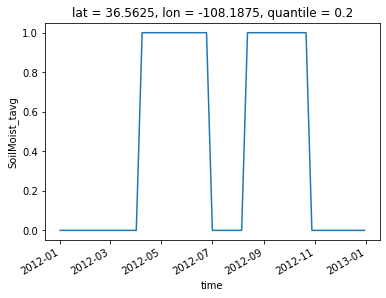

In [100]:
window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

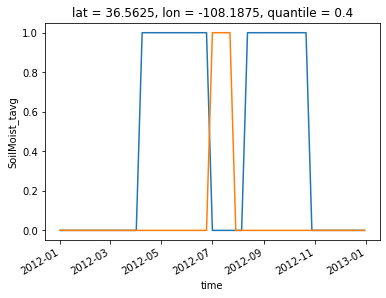

In [36]:
window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()
window_2_bool.shift(time=-3).sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()


In [16]:
window_1_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
    lat       float64 36.56
    lon       float64 -108.2
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    quantile  float64 0.2
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

In [17]:
window_2_bool.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
    lat       float64 36.56
    lon       float64 -108.2
  * time      (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    quantile  float64 0.4
    week      (time) int64 52 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52

In [179]:
FD_weeks.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

<xarray.DataArray 'SoilMoist_tavg' (time: 53)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
    lat      float64 36.56
    lon      float64 -108.2
  * time     (time) datetime64[ns] 2012-01-01 2012-01-08 ... 2012-12-30
    week     (time) int64 52 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50 51 52

In [95]:
import xarray as xr

# Open weekly temperatures for 5 years
ds = SM5_US_point

# Use rolling with two consecutive windows such that in the second window weekly temperature data should be below the 20th percentile in each individual weeks, and in the first window temperature data should be above the 40th percentile in each individual weeks
window_1 = ds.rolling(time=3, center=True).construct('window_dim').dropna(dim='time')
window_1_bool = ((window_1 > percentile_40) & (window_1.time % 53 != 0)).all(dim='window_dim').astype(int)

window_2 = ds.rolling(time=3, center=True).construct('window_dim').dropna(dim='time')
window_2_bool = ((window_2 < percentile_20) & (window_2.time % 53 != 0)).all(dim='window_dim').astype(int)

# The output size should be like the input weekly temperature data but it should have 1 or 0 values according to both above conditions
output_data = xr.Dataset({'window_1_bool': window_1_bool, 'window_2_bool': window_2_bool}, coords={'time': ds.time})

UFuncTypeError: ufunc 'remainder' cannot use operands with types dtype('<M8[ns]') and dtype('int64')

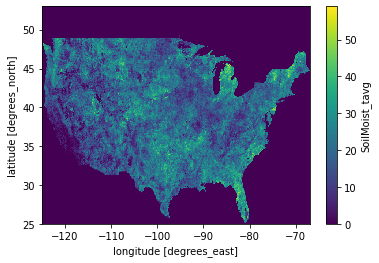

In [47]:
#total number of weeks in flash drought in 37 years    #60weeks/(43*37)=0.038 based on defenition duration==2   #this is %time.
dry_weeks_with_above.sum(dim="time").plot()

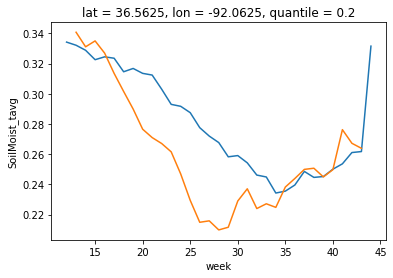

In [35]:
percentile_20.sel(lat = 36.5625, lon=-92.0625).plot()
y = SM5_US_point.sel(lat = 36.5625, lon=-92.0625).sel(time=slice("2012-01-01","2012-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)



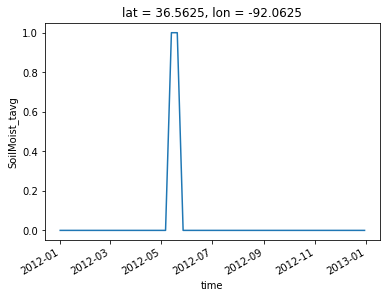

In [36]:
dry_weeks_with_above.sel(lat = 36.5625, lon=-92.0625).sel(time=slice("2012-01-01","2012-12-31")).plot()

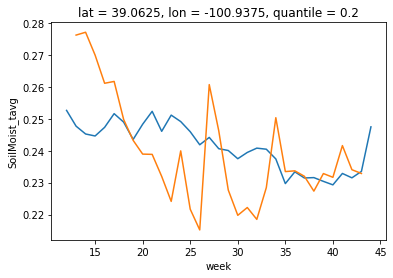

In [37]:
percentile_20.sel(lat = 39.0625, lon=-100.9375).plot()
y= SM5_US_point.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)

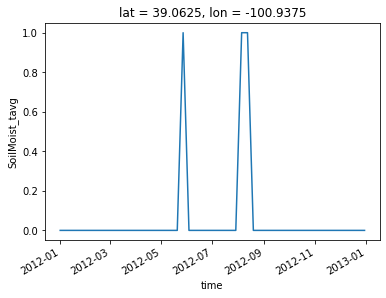

In [38]:
dry_weeks_with_above.sel(lat = 39.0625, lon=-100.9375).sel(time=slice("2012-01-01","2012-12-31")).plot()

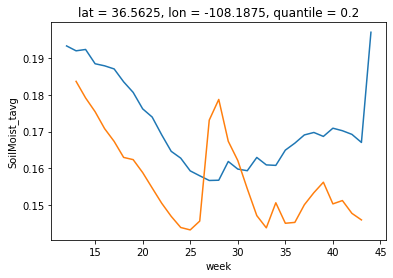

In [39]:
percentile_20.sel(lat = 36.5625, lon=-108.1875).plot()
y= SM5_US_point.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31"))

x = np.arange(1,54)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)

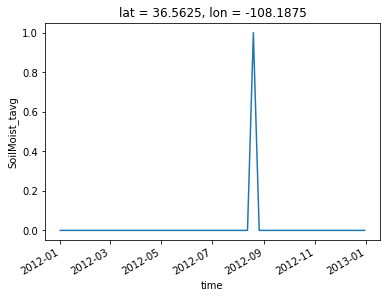

In [40]:
dry_weeks_with_above.sel(lat = 36.5625, lon=-108.1875).sel(time=slice("2012-01-01","2012-12-31")).plot()

In [ ]:
#provides weeks with below 20th percentiles accorrding to 53 weeks in each year
temp = SM5_US_point.groupby('time.week')
one_per_week = xr.ones_like(SM5_US_point)
#zero_per_week = xr.zeros_like(SM5_US_point)

num_dry_weeks = one_per_week.where(temp < percentile_20)
#dry_weeks = zero_per_week.where(temp >= percentile_20)

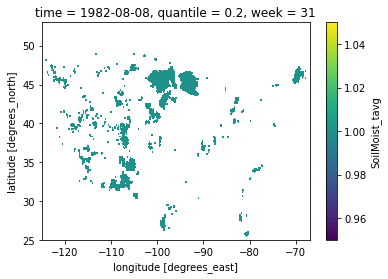

In [134]:
num_dry_weeks = one_per_week.where(temp < percentile_20)
num_dry_weeks.isel(time=100).plot()

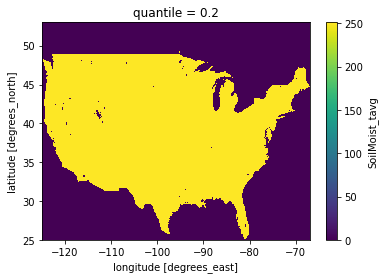

In [142]:
num_dry_weeks.sum(dim="time").plot()

In [ ]:
#empty

In [140]:
x = SM5_US_point.sel(lat = 36.5625, lon=-108.1875)
SM_q20 = np.zeros(53)
SM_q40 = np.zeros(53)
for i in range(53):
    week_data = np.append(x[i])
    SM_q20[i] = np.percentile(week_data, 20)
    SM_q40[i] = np.percentile(week_data, 40)

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [139]:


%%time

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')


#ATTENTION: This is based on weeks not pentads!



def flashdrought(SM5_US_point):
    
    #####################SM5_US_point = SM5_US_point[0:2648]
    
    #Duration_FD = np.zeros((14, 38))    #RELATED TO ERROR SIZES
    #Frequency_FD = np.zeros((14, 38))
    #Severity_FD = np.zeros((14, 38))
    FD = []
    #index = []
    Dur_FD = []    #Events less than 40 percentile 
    Sev_FD = []    #deficit in SM from 40 percentile 
    #S = []
    Freq_FD = []
    L = []
    Fr = []
    #SM_q20 = np.nanquantile(SM5_US_point, [0.20])
    #SM_q40 = np.nanquantile(SM5_US_point, [0.40])
    
    #x1 = SM5_US_point.groupby(SM5_US_point.time.dt.month)
    #SM_q20 = x1.quantile([0.20])
    #SM_q40 = x1.quantile([0.40])
    
    #each year has 53 weeks!
    #SM_q20 = np.zeros(53)
    #SM_q40 = np.zeros(53)
    #for i in range(53):
    #    week_data = SM5_US_point[SM5_US_point['time.week'] == i+1]
    #    SM_q20[i] = np.percentile(week_data, 20)
    #    SM_q40[i] = np.percentile(week_data, 40)
        
    SM_q20 = np.zeros(53)
    SM_q40 = np.zeros(53)
    for i in range(53):
        week_data = np.append(SM5_US_point[i])
        SM_q20[i] = np.percentile(week_data, 20)
        SM_q40[i] = np.percentile(week_data, 40)
    
    ######SM5_US_point_1979 = SM5_US_point[round((2006-1981)*12*30/5+1*30/5):round(12*30/5+round((2014-1981)*12*30/5+4*30/5))] 
    
    #SM5_US_point.flags.writeable = True
    #SM5_US_point[round((2017-1981)*12*30/5+1*30/5):round(7*30/5+round((2017-1981)*12*30/5+1*30/5))] = -999     #First 43 pentads have to NA to exclude them from our calculation; those are in past year (2011) 
    #SM5_US_point_1979 = SM5_US_point[round((2017-1981)*12*30/5+1*30/5):round(12*30/5+round((2017-1981)*12*30/5+4*30/5))]    #only computes FD char. 2012, months 4-10
    #OLD#SM5_US_point_1979 = SM5_US_point[round((2012-1981)*12*30/5+5*30/5):round(12*30/5+round((2012-1981)*12*30/5+8*30/5))]    #only computes FD char. 2012, months 4-10     #remove it later for entire year 2012
    SM5_US_point_1979 = SM5_US_point
    
    
    index = np.zeros((SM5_US_point_1979.size)+31)#,dtype=np.object)
    fd = np.zeros(SM5_US_point_1979.size-1+31)
    fd_DROUGHT = np.zeros(SM5_US_point_1979.size-1+31)
    onset_drought = np.zeros(SM5_US_point_1979.size-1+31)   #not sure 
    S = np.zeros(SM5_US_point_1979.size-1+31)
    onset = np.zeros(SM5_US_point_1979.size-1+31)
    onset_20 = np.zeros(SM5_US_point_1979.size-1+31)
    du = np.zeros(SM5_US_point_1979.size-1+31)

    ###calculate the FD as it stays below 20% for at least 2 weeks (rapid decline is less than 3 weeks)
    for i in range(31, (SM5_US_point_1979.size-1)):
 

        #here1
        if SM5_US_point_1979[i-2] <=  SM_q20[i] and SM5_US_point_1979[i-1] <=  SM_q20[i] and SM5_US_point_1979[i] <=  SM_q20[i]: #two weeks below 20 percentile!  #duration is at least 2 weeks 
        
            
            if SM5_US_point_1979[i-3] >= SM_q40[i] or SM5_US_point_1979[i-4] >= SM_q40[i] or SM5_US_point_1979[i-5] >= SM_q40[i]:   
                
                #FD onset; exact time falls below 20% (although we conisdred i-3 or i-4 or i-5 above 40 percentile, the values below 20 percentile are at most for 2 weeks! from i-4 to i-3 or from i-3 to i-2; defenitly these are below 20%: from i-2 to i-1 or from i-1 to i )
                if SM5_US_point_1979[i-3] > SM_q20[i]:  #SM_q20 becuase it considers all of them and we have the condition above 40 % in above line!
                    onset_20[i-2] = 1
                    fd[i-2] = 1
                    fd[i-1] = 1
                    fd[i] = 1
                    S[i-2] = SM5_US_point_1979[i-2] - SM_q40[i]
                    S[i-1] = SM5_US_point_1979[i-1] - SM_q40[i]
                    S[i] = SM5_US_point_1979[i] - SM_q40[i]
                    
            
                    
                elif SM5_US_point_1979[i-4] > SM_q20[i]:
                    onset_20[i-3] = 1
                    fd[i-3] = 1
                    fd[i-2] = 1
                    fd[i-1] = 1
                    fd[i] = 1
                    S[i-3] = SM5_US_point_1979[i-3] - SM_q40[i]
                    S[i-2] = SM5_US_point_1979[i-2] - SM_q40[i]
                    S[i-1] = SM5_US_point_1979[i-1] - SM_q40[i]
                    S[i] = SM5_US_point_1979[i] - SM_q40[i]
                    
                else:
                    onset_20[i-4] = 1
                    fd[i-4] = 1
                    fd[i-3] = 1
                    fd[i-2] = 1
                    fd[i-1] = 1
                    fd[i] = 1
                    S[i-4] = SM5_US_point_1979[i-4] - SM_q40[i]
                    S[i-3] = SM5_US_point_1979[i-3] - SM_q40[i]
                    S[i-2] = SM5_US_point_1979[i-2] - SM_q40[i]
                    S[i-1] = SM5_US_point_1979[i-1] - SM_q40[i]
                    S[i] = SM5_US_point_1979[i] - SM_q40[i]
                    
                    
                #FD termination condition      #whatif remove the termination condition and only consider FLASH part of FLASH DROUGHT
                for k in range(i+1,SM5_US_point_1979.size-1):
                    if SM5_US_point_1979[k] < SM_q20[i]:
                        #L = L+1
                        S[k] = SM5_US_point_1979[k] - SM_q40[i]
                        fd[k] = 1
                
                
                    else:
                        fd[k] = 0
                        break    #jump out of closest loop
                        
                        
    ###calculate the duration (values below 20%; later one-week events are exculded from duration) and the onset(number) of DROUGHTS     
    for i in range(31, (SM5_US_point_1979.size-1)):   #it requires new loop!
        
        sum=0   #duration in each event 
        
        if fd[i+1] > fd[i]: #and fd[i+2] > fd[i] and fd[i+3] > fd[i]:   #important: this condition jump to a new event!       
        #    onset[i+1] = 1    #represents frequency!     #the problem with "onset" is that we do not know when is the onset: i-4, ... but it does'nt matter since fd calculation is completed  ----> onset better than onset20   #The event is FD if it sustains at least for 2 weeks while the rapid decline in 1/2/3 weeks
        #   #freq[i+1] = freq[i] + 1  
            
                    
            for k in range(i+2,SM5_US_point_1979.size-1):
                
                    
                if fd[k] == fd[k-1]:
                    sum=sum+1
                    du[k-1] = 0     #it stores the accumulation only at the end of FD
                    du[k] = sum     #since this du includes event with 0 week duration, it needs to excule that later! But there is no event with 1 week duration as we have considered this in fd.
                    
                    if k == i+5:
                        onset_drought[i+5] = 1    #number of DROUGHT events (with duration >=5 weeks)   #recently added to calcluate how many percentage ended up with Drought 

                    
                    if k==59 or k==112 or k==164 or k==216 or k==268 or k==320 or k==372 or k==425 or k==477 or k==529 or k==581 or k==633 or k==686 or k==738 or k==790 or k==842 or k==894 or k==946 or k==999 or k==1051 or k==1103 or k==1155 or k==1207 or k==1260 or k==1312 or k==1364 or k==1416 or k==1468 or k==1520 or k==1573 or k==1625 or k==1677 or k==1729 or k==1781 or k==1833 or k==1886 or k==1937:
                        break

                else:
                    break 
                        
                        
                    
            
            
          
        
            
        

    
    #Duration_FD = np.nanmean(Dur_FD)
    ##print(Dur_FD)
    #print(Sev_FD)
    #Frequency_FD = len(Dur_FD)
    #Severity_FD = -1*np.nanmean(Sev_FD)  #ValueError: setting an array element with a sequence   #sum? 
    
    #return fd
    return S
    #return onset
    #return onset_20         #onset20 is correct 
    #return onset_drought
    #return du
     
    



client


#if k==1937 or k==1937-52*1 or k==1937-52*2 or k==1937-52*3 or k==1937-52*4 or k==1937-52*5 or k==1937-52*6 or k==1937-52*7 or k==1937-52*8 or k==1937-52*9 or k==1937-52*10 or k==1937-52*11 or k==1937-52*12 or k==1937-52*13 or k==1937-52*14 or k==1937-52*15 or k==1937-52*16 or k==1937-52*17 or k==1937-52*18 or k==1937-52*19 or k==1937-52*20 or k==1937-52*21 or k==1937-52*22 or k==1937-52*23 or k==1937-52*24 or k==1937-52*25 or k==1937-52*26 or k==1937-52*27 or k==1937-52*28 or k==1937-52*29 or k==1937-52*30 or k==1937-52*31 or k==1937-52*32 or k==1937-52*33 or k==1937-52*34 or k==1937-52*35 or 1937-52*36:                       


CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 28.4 µs


<Client: 'tcp://10.12.206.63:42390' processes=1 threads=1, memory=100.00 GB>

In [140]:
%%time

##import bottleneck
##Frequency_FD = xr.apply_ufunc(flashdrought, SM5_US_point, input_core_dims=[["time"]], dask = 'allowed', vectorize = True)      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
##client


#Severity = xr.apply_ufunc(flashdrought, SM5_US_point, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
#client

three_dim = xr.apply_ufunc(flashdrought, SM5_US_point, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
client

#onset = xr.apply_ufunc(flashdrought, SM5_US_point, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
#client

#onset_20 = xr.apply_ufunc(flashdrought, SM5_US_point, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
#client

#onset_drought = xr.apply_ufunc(flashdrought, SM5_US_point, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
#client

#Duration = xr.apply_ufunc(flashdrought, SM5_US_point, input_core_dims=[["time"]], output_core_dims=[["time_new"]], dask = 'allowed', vectorize = True).rename({'time_new': 'time'})      #the only issue for apply_ufunc is na! this is the case for both flashdrought3 and flashdrought!!!!!!!!!!!!!!!!!!!! Solve first for flashdrought3!!!!!!!!!   Reminder only dask: -1 according to stackoverflow!!!
#client

#Add this for three_dim related to FD index2 
# output_core_dims=[["time"]],

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [9]:
#t_new = DA5_US.time[0:2715]
lat = np.linspace(25.0625, 52.9375 , num=224)
lon = np.linspace(-124.9375, -67.0625 , num=464)

binary = xr.DataArray(data=three_dim.isel(time=slice(0,three_dim.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,SM5_US_point.time])

#binary_sev = xr.DataArray(data=Severity.isel(time=slice(0,Severity.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,SM5_US_point.time])

#binary_onset = xr.DataArray(data=onset.isel(time=slice(0,onset.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,SM5_US_point.time])

#binary_onset_20 = xr.DataArray(data=onset_20.isel(time=slice(0,onset_20.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,SM5_US_point.time])

#binary_onset_drought = xr.DataArray(data=onset_drought.isel(time=slice(0,onset_drought.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,SM5_US_point.time])

#binary_dur = xr.DataArray(data=Duration.isel(time=slice(0,Duration.time.size-31+1)), dims=["lat", "lon","time"], coords=[lat,lon,SM5_US_point.time])



In [12]:
binary_sev_norm = (binary_sev)/(binary_sev.min())*5

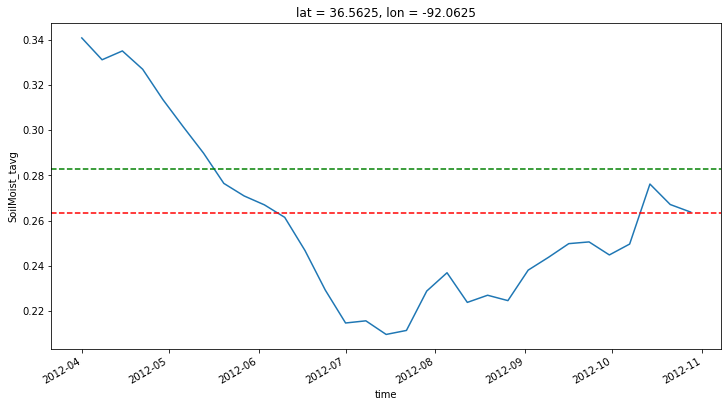

In [5]:
SM5_US_point.sel(lon=-92.0625,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6) 
plt.axhline(y=SM5_US_point.sel(lon=-92.0625,lat=36.5625, method="nearest").quantile([0.20], 'time'), color='r', linestyle='dashed', label='20 percentile')    #20 percentile = 29.8
plt.axhline(y=SM5_US_point.sel(lon=-92.0625,lat=36.5625, method="nearest").quantile([0.40], 'time'), color='g', linestyle='dashed', label='40 percentile')     #40 percentile = 31.2


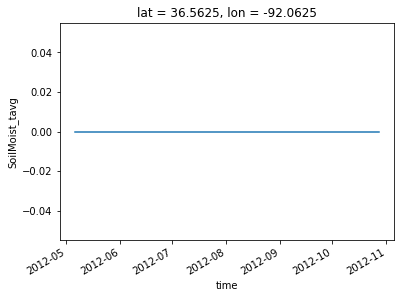

In [6]:
binary.sel(lon=-92.0625,lat=36.5625, time=slice('2012-05-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot()

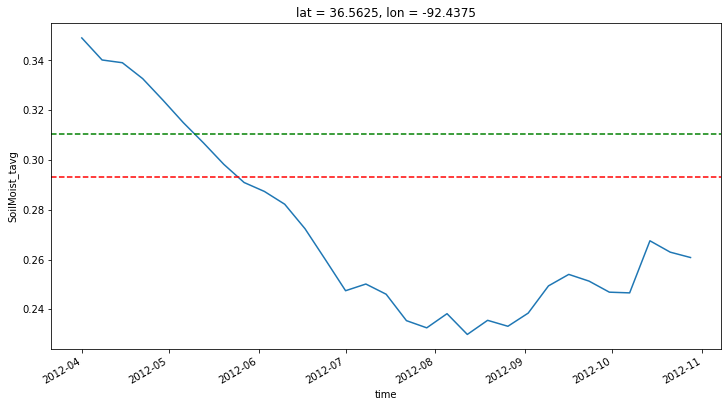

In [27]:
SM5_US_point.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6) 
plt.axhline(y=SM5_US_point.sel(lon=-92.4375,lat=36.5625, method="nearest").quantile([0.20], 'time'), color='r', linestyle='dashed', label='20 percentile')    #20 percentile = 29.8
plt.axhline(y=SM5_US_point.sel(lon=-92.4375,lat=36.5625, method="nearest").quantile([0.40], 'time'), color='g', linestyle='dashed', label='40 percentile')     #40 percentile = 31.2


In [26]:
binary.sel(lon=-92.4375,lat=36.5625, time=slice('2012-05-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

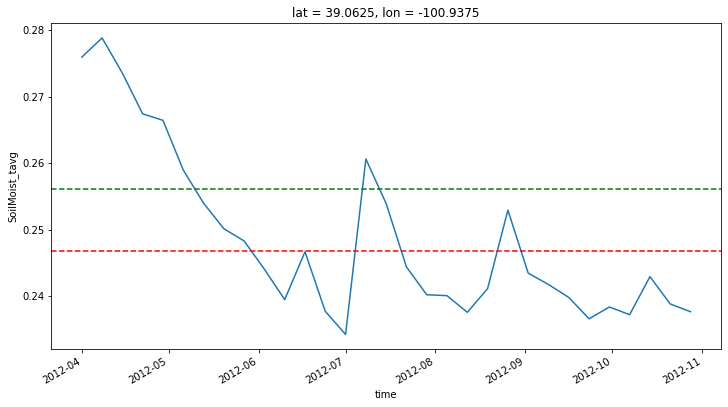

In [25]:
SM5_US_point.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6) 
plt.axhline(y=SM5_US_point.sel(lon=-100.9375,lat=39.0625, method="nearest").quantile([0.20], 'time'), color='r', linestyle='dashed', label='20 percentile')    #20 percentile = 29.8
plt.axhline(y=SM5_US_point.sel(lon=-100.9375,lat=39.0625, method="nearest").quantile([0.40], 'time'), color='g', linestyle='dashed', label='40 percentile')     #40 percentile = 31.2


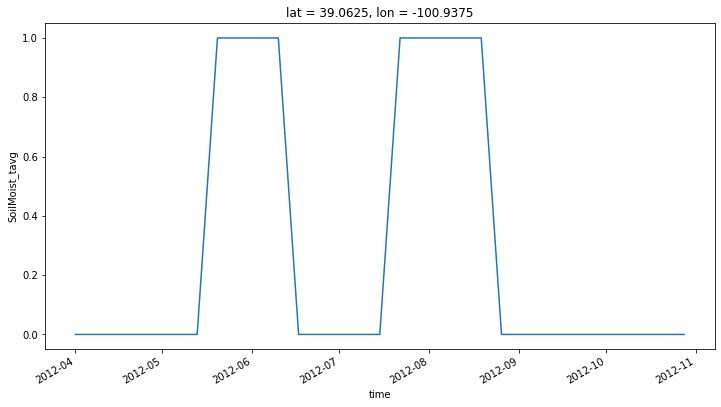

In [7]:
binary.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev_norm.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)



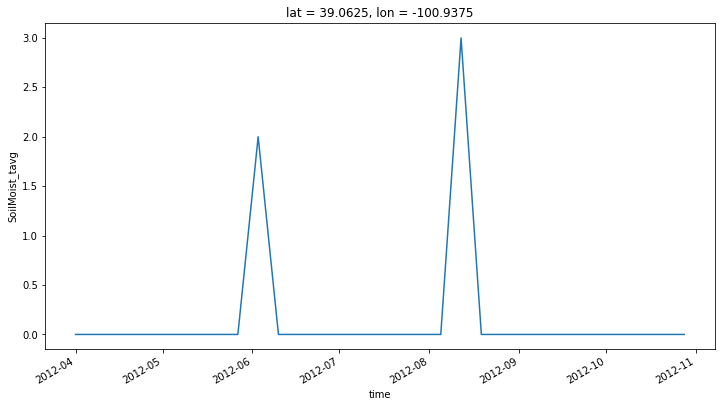

In [21]:
#only FLASH part
binary_dur.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


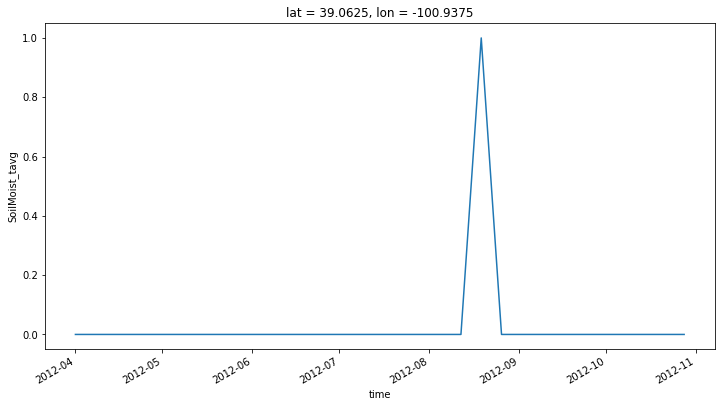

In [76]:
binary_onset_drought.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev_norm.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


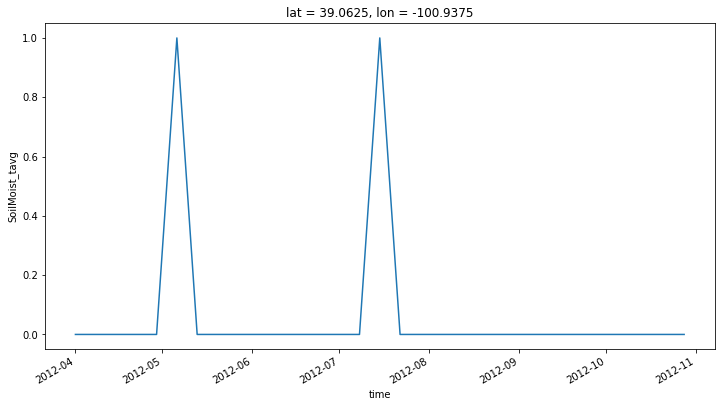

In [94]:
binary_onset.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev_norm.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


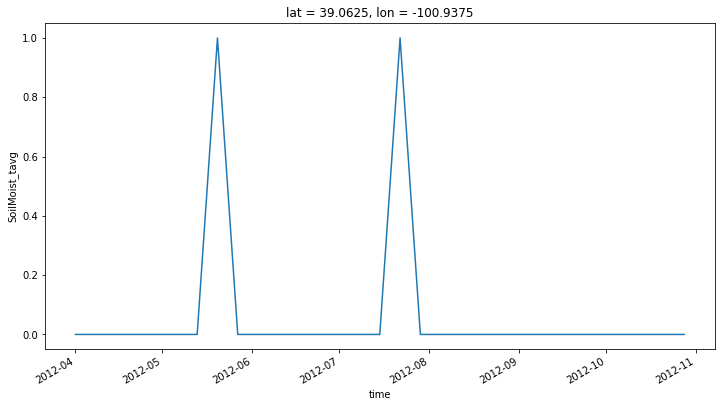

In [64]:
binary_onset_20.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev_norm.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


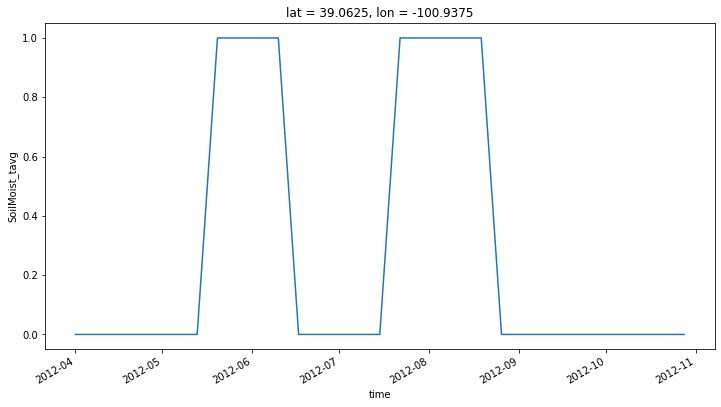

In [85]:
#test is fd has no duration!

binary.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev_norm.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


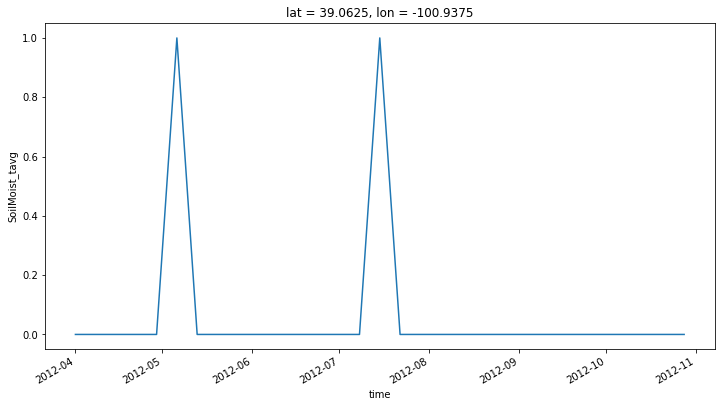

In [93]:
binary_onset.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


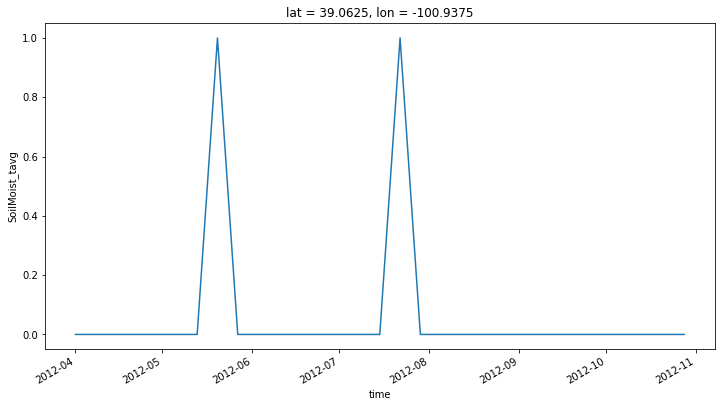

In [65]:
binary_onset_20.sel(lon=-100.9375,lat=39.0625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


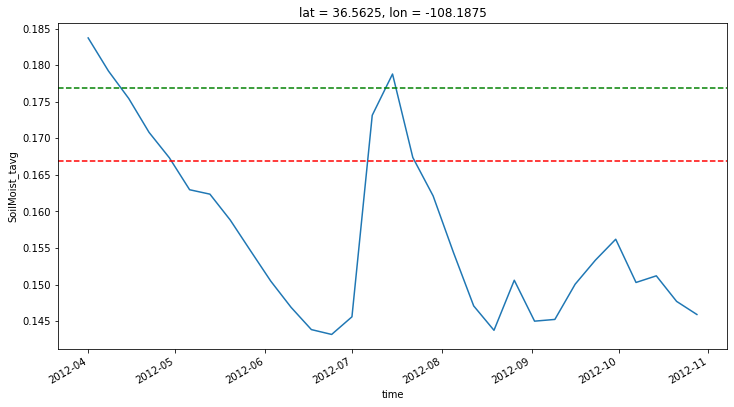

In [9]:
SM5_US_point.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6) 
plt.axhline(y=SM5_US_point.sel(lon=-108.1875,lat=36.5625).quantile([0.20], 'time'), color='r', linestyle='dashed', label='20 percentile')    #20 percentile = 29.8
plt.axhline(y=SM5_US_point.sel(lon=-108.1875,lat=36.5625).quantile([0.40], 'time'), color='g', linestyle='dashed', label='40 percentile')     #40 percentile = 31.2


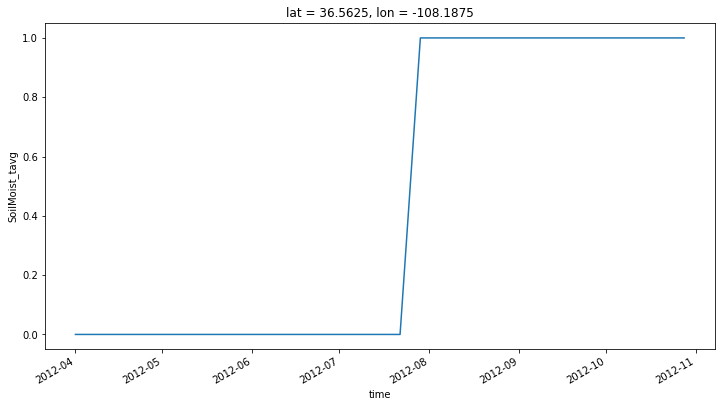

In [8]:
binary.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


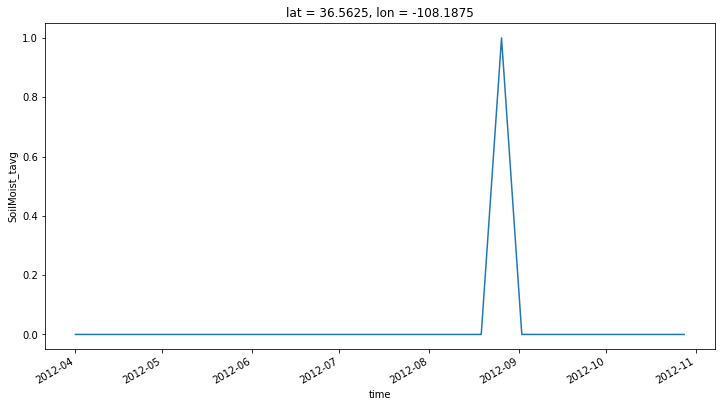

In [74]:
binary_onset_drought.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


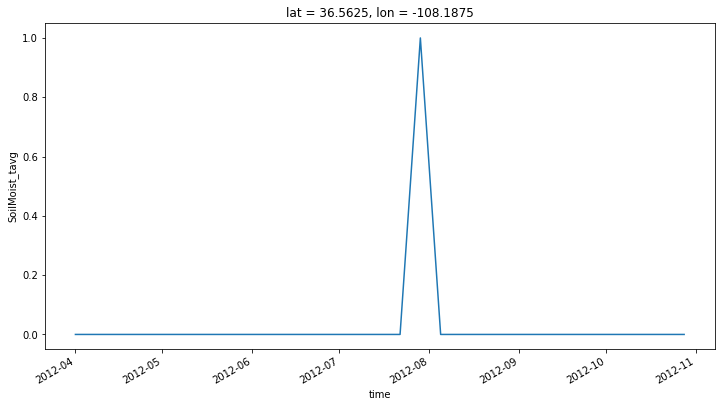

In [66]:
binary_onset_20.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


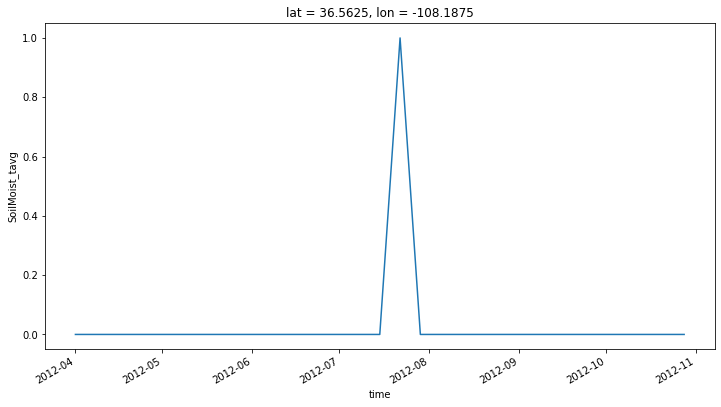

In [9]:
binary_onset.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


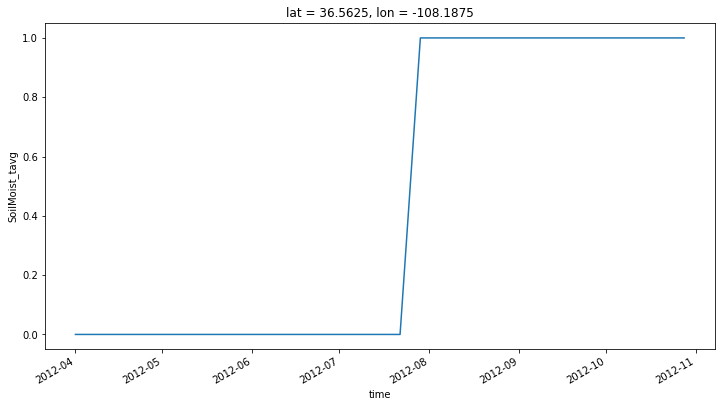

In [87]:
#test if fd has no duration

binary.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


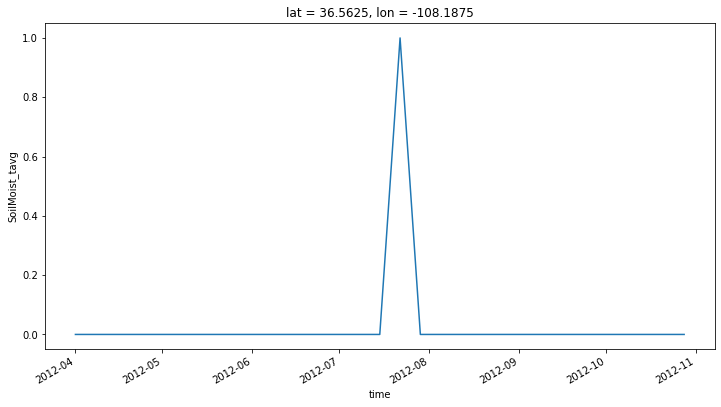

In [8]:
binary_onset.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


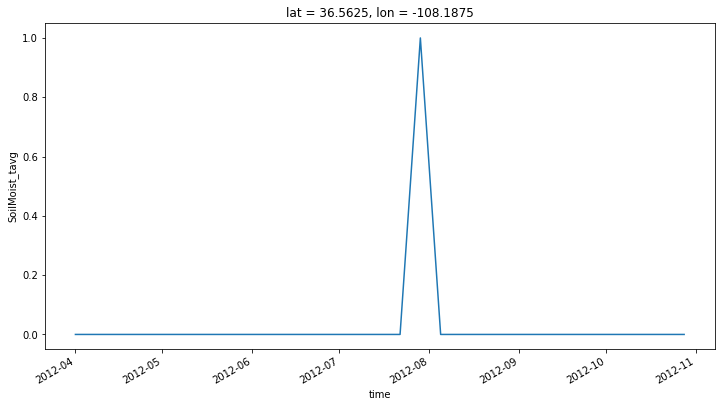

In [67]:
binary_onset_20.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


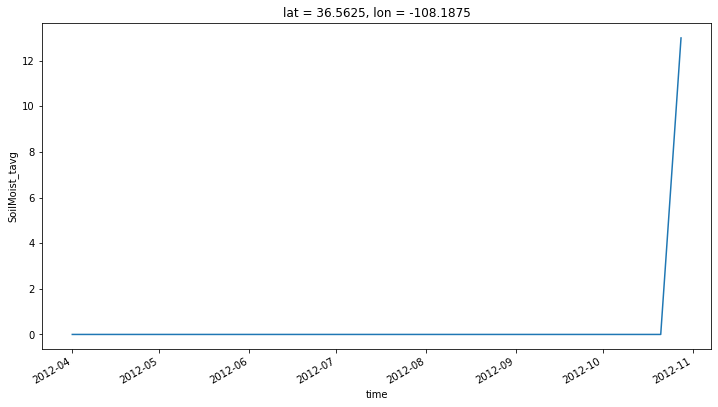

In [57]:

binary_dur.sel(lon=-108.1875,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


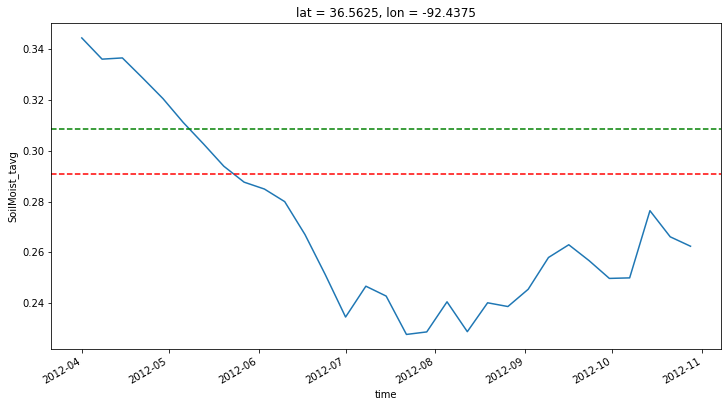

In [11]:
SM5_US_point.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6) 
plt.axhline(y=SM5_US_point.sel(lon=-92.4375,lat=36.5625, method="nearest").quantile([0.20], 'time'), color='r', linestyle='dashed', label='20 percentile')    #20 percentile = 29.8
plt.axhline(y=SM5_US_point.sel(lon=-92.4375,lat=36.5625, method="nearest").quantile([0.40], 'time'), color='g', linestyle='dashed', label='40 percentile')     #40 percentile = 31.2


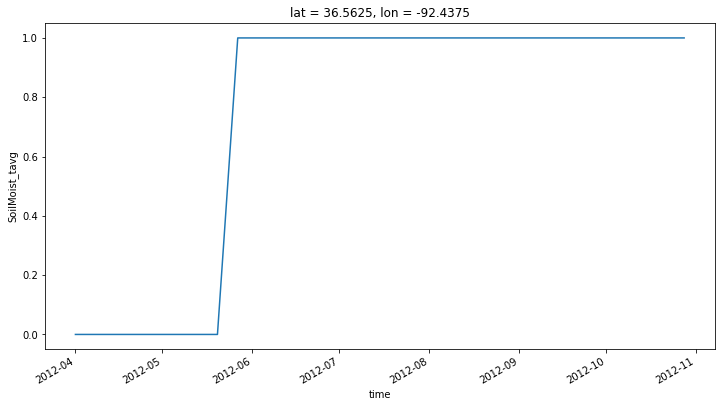

In [9]:
binary.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


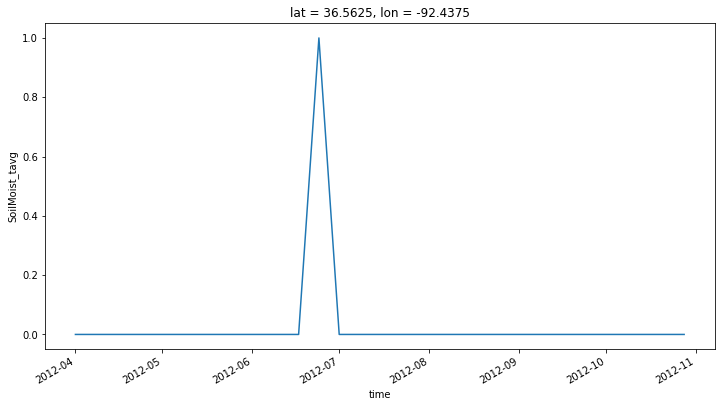

In [75]:
binary_onset_drought.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


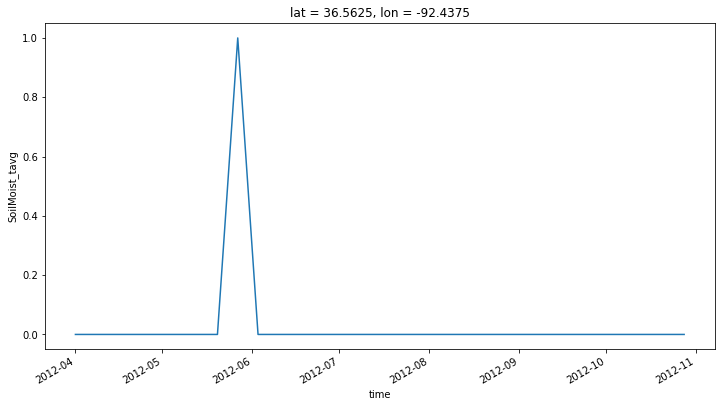

In [68]:
binary_onset_20.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


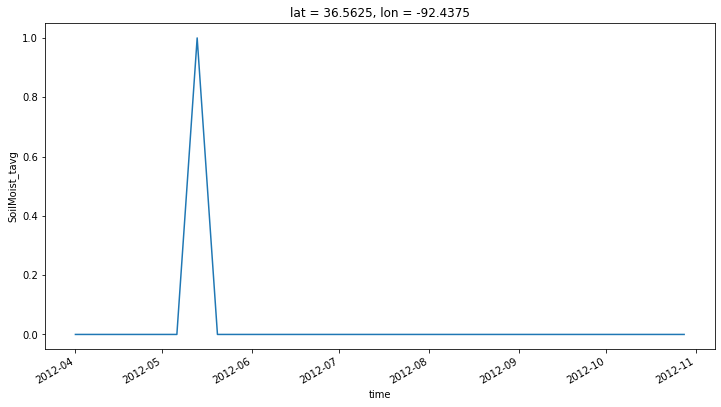

In [7]:
binary_onset.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


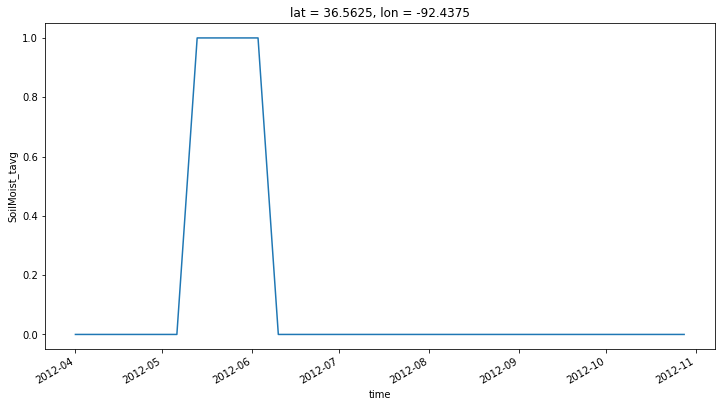

In [7]:
#test if fd has no duration

binary.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)
#binary_sev.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


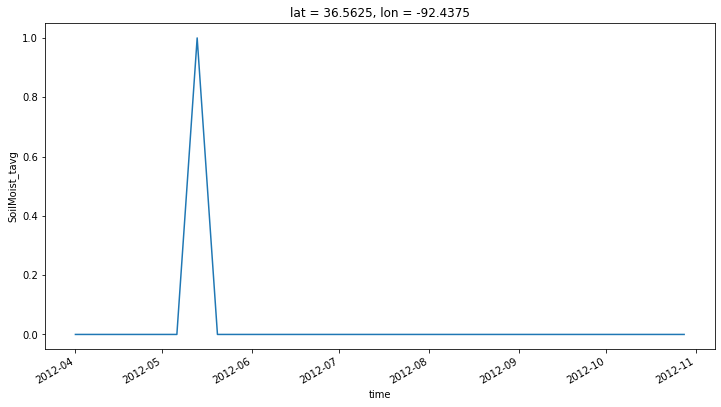

In [6]:
binary_onset.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


In [81]:
binary_onset_20.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


NameError: name 'binary_onset_20' is not defined

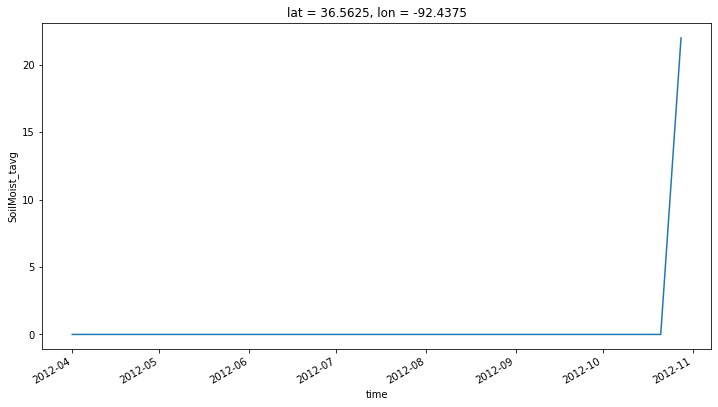

In [58]:
binary_dur.sel(lon=-92.4375,lat=36.5625, time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).plot(aspect=2, size=6)


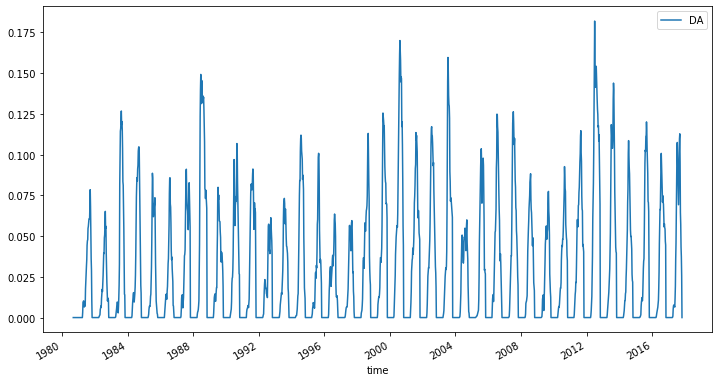

In [13]:
weights = np.cos(np.deg2rad(binary.lat))
weights.name = "weights"
air_weighted_DA = binary.weighted(weights)
#air_weighted_OL = Binary_OL_17_Gr.weighted(weights)

air_weighted_DA.mean(dim=["lon","lat"]).plot(aspect=2, size=6,label="DA")
#air_weighted_OL.mean(dim=["lon","lat"]).plot(label="OL")

plt.legend()

(array([2.78261e+05, 1.23211e+05, 7.16410e+04, 3.97270e+04, 4.37260e+04,
        1.77550e+04, 6.05100e+03, 4.56800e+03, 7.95000e+02, 1.18000e+02]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ]),
 <BarContainer object of 10 artists>)

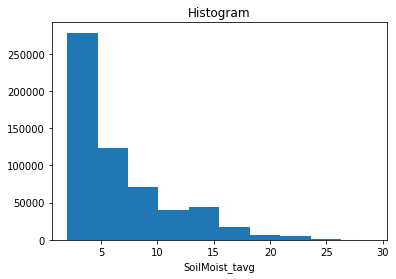

In [112]:
#First get rid of zero durations! 
Binary_dur2 = binary_dur.where(binary_dur !=0, drop=True) 
Binary_dur2 = Binary_dur2.where(Binary_dur2 !=1, drop=True)   

Binary_dur2.plot.hist()   #ax=axs[1]



(array([331., 286., 155.,  83.,  55.,  37.,  26.,  14.,   6.,   6.]),
 array([ 2.        ,  3.38266667,  4.76533333,  6.148     ,  7.53066667,
         8.91333333, 10.296     , 11.67866667, 13.06133333, 14.444     ,
        15.82666667]),
 <BarContainer object of 10 artists>)

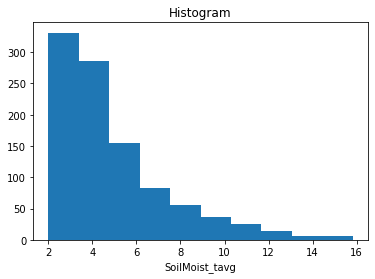

In [113]:
Binary_dur2.mean(["lon","lat"]).plot.hist()   #ax=axs[1]


In [115]:
Binary_dur2.min()

<xarray.DataArray 'SoilMoist_tavg' ()>
array(2.)

In [6]:

# Do not remove! 
#binary.to_netcdf('/glade/work/afallah/data/binary_DA_198009_new_way_weekly_short.nc', mode='w')   #could be ...truncated if only consider the rapid intensification period 
#binary.to_netcdf('/glade/work/afallah/data/binary_OL_198009_new_way_weekly_short.nc', mode='w')


binary_sev.to_netcdf('/glade/work/afallah/data/binary_sev_DA_198009_new_way_weekly_short.nc', mode='w')
#binary_sev.to_netcdf('/glade/work/afallah/data/binary_sev_OL_198009_new_way_weekly_short.nc', mode='w')

#binary_onset.to_netcdf('/glade/work/afallah/data/binary_onset_DA_198009_new_way_weekly.nc', mode='w')
#binary_onset.to_netcdf('/glade/work/afallah/data/binary_onset_OL_198009_new_way_weekly.nc', mode='w')

#binary_onset_20.to_netcdf('/glade/work/afallah/data/binary_onset_20_DA_198009_new_way_weekly_short.nc', mode='w')
#binary_onset_20.to_netcdf('/glade/work/afallah/data/binary_onset_20_OL_198009_new_way_weekly_short.nc', mode='w')

#binary_onset_drought.to_netcdf('/glade/work/afallah/data/binary_onset_drought_DA_198009_new_way_weekly.nc', mode='w')
#binary_onset_drought.to_netcdf('/glade/work/afallah/data/binary_onset_drought_OL_198009_new_way_weekly.nc', mode='w')


#binary_dur.to_netcdf('/glade/work/afallah/data/binary_dur_DA_198009_new_way_weekly_short.nc', mode='w')
#binary_dur.to_netcdf('/glade/work/afallah/data/binary_dur_OL_198009_new_way_weekly_short.nc', mode='w')


(array([2.78261e+05, 1.23211e+05, 7.16410e+04, 3.97270e+04, 4.37260e+04,
        1.77550e+04, 6.05100e+03, 4.56800e+03, 7.95000e+02, 1.18000e+02]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ]),
 <BarContainer object of 10 artists>)

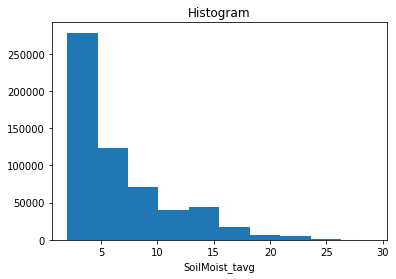

In [116]:
#test
Binary_dur0 = binary_dur.where(binary_dur !=0, drop=True) 

Binary_dur0.plot.hist()   #ax=axs[1]


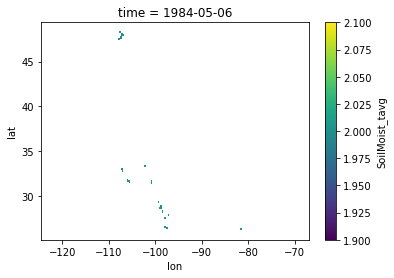

In [117]:
#test
#Binary_dur0.min()
Binary_dur0.isel(time=80).where(Binary_dur0.isel(time=80) == 2).plot()

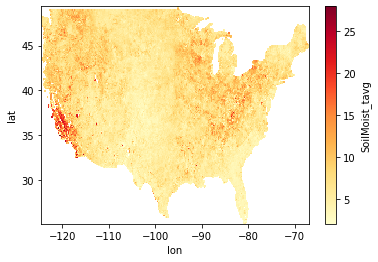

In [107]:
#test
Binary_dur0.mean(dim='time').plot(cmap='YlOrRd')

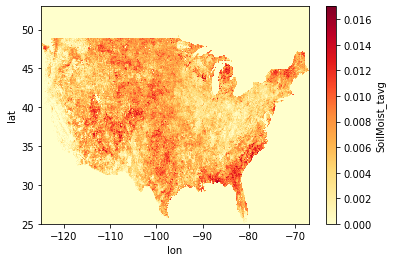

In [108]:
#test
binary_onset_20.mean(dim='time').plot(cmap='YlOrRd')

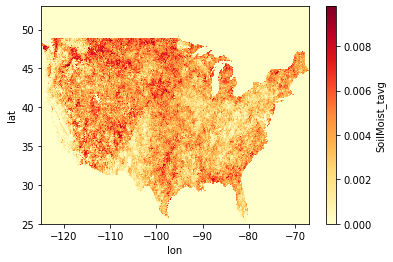

In [109]:
#test
binary_onset_drought.mean(dim='time').plot(cmap='YlOrRd')

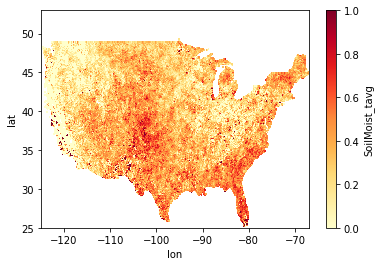

In [110]:
#test
a = binary_onset_20.mean(dim='time')
b = binary_onset_drought.mean(dim='time')
(1-b/a).plot(cmap='YlOrRd')

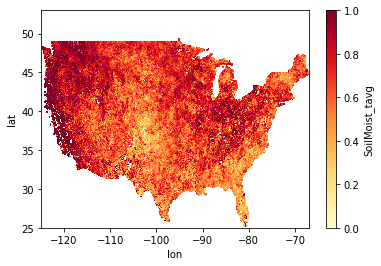

In [111]:
#test
a = binary_onset_20.mean(dim='time')
b = binary_onset_drought.mean(dim='time')
(b/a).plot(cmap='YlOrRd')

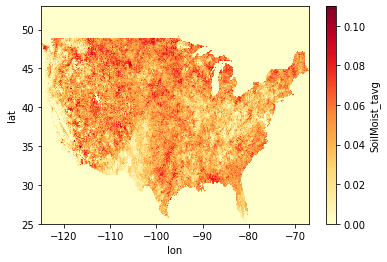

In [93]:

binary.mean(dim='time').plot(cmap='YlOrRd')

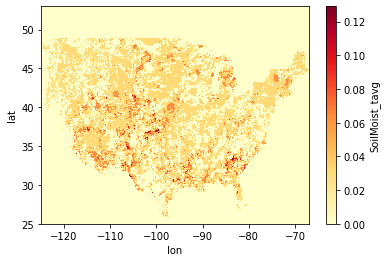

In [141]:
binary_onset_20.sel(time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).mean(dim='time').plot(cmap='YlOrRd')

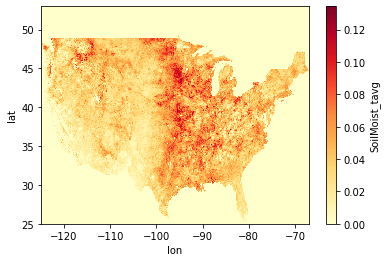

In [118]:
binary_sev_norm.mean(dim='time').plot(cmap='YlOrRd')

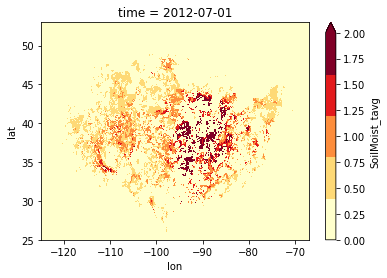

In [120]:
import matplotlib.cm as cm
cmap2 = cm.get_cmap("YlOrRd",lut=5)
cmap2.set_under("k")

binary_sev_norm.sel(time='2012-07-01T00:00:00.000000000').plot(vmin=0,vmax=2,cmap=cmap2)

In [67]:
binary_onset_yearly = binary_onset.resample(time="Y").sum()


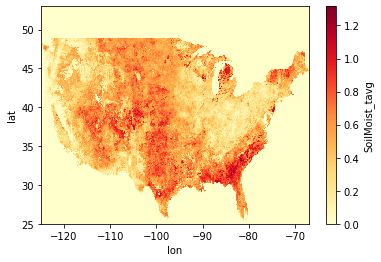

In [68]:
binary_onset_yearly.mean(dim="time").plot(cmap='YlOrRd')    ##this shows frequency

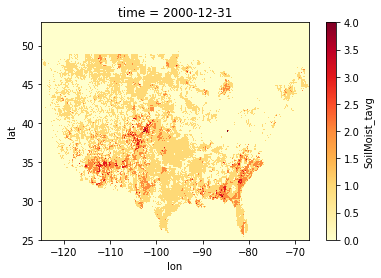

In [69]:
binary_onset_yearly.isel(time=20).plot(cmap='YlOrRd')   #Whole year 2000    #this shows total frequency in each year

In [118]:
#assign 1 for each each year with at least one FD event

binary_onset_20_yearly = binary_onset_20.resample(time="Y").sum()
a = binary_onset_20_yearly
b = xr.where(a >= 1, 1, 0) 

In [121]:
binary_onset_20_yearly.sel(lon=-100.9375,lat=39.0625)

<xarray.DataArray 'SoilMoist_tavg' (time: 38)>
array([0., 0., 0., 1., 2., 1., 1., 1., 3., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 2., 1., 0., 1., 2., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1.])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-31 1981-12-31 ... 2017-12-31
    lat      float64 39.06
    lon      float64 -100.9

In [122]:
b.sel(lon=-100.9375,lat=39.0625)

<xarray.DataArray 'SoilMoist_tavg' (time: 38)>
array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-31 1981-12-31 ... 2017-12-31
    lat      float64 39.06
    lon      float64 -100.9

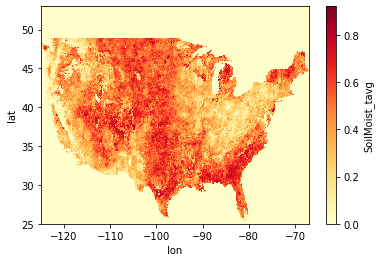

In [123]:
b.mean(dim="time").plot(cmap='YlOrRd')    ##this shows frequency


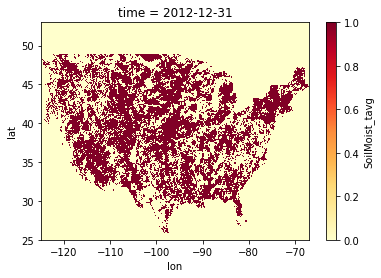

In [144]:
b.isel(time=32).plot(cmap='YlOrRd')    ##this shows frequency


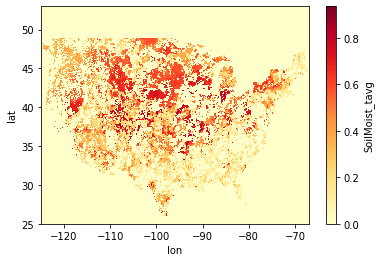

In [14]:
binary.sel(time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).mean(dim='time').plot(cmap='YlOrRd')

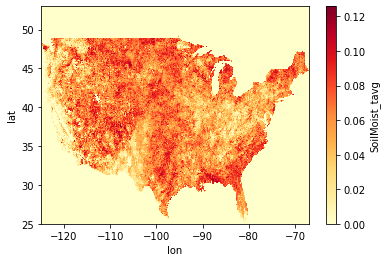

In [15]:
binary.mean(dim='time').plot(cmap='YlOrRd')

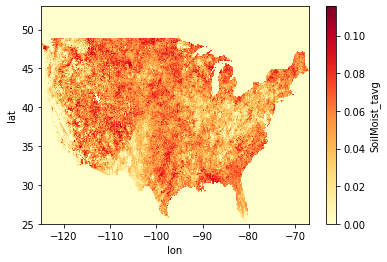

In [15]:
binary_dur.mean(dim='time').plot(cmap='YlOrRd')

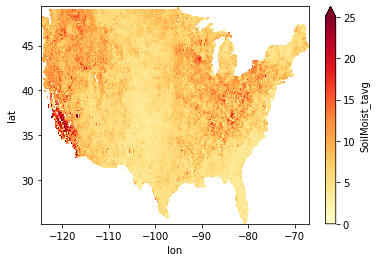

In [36]:
#Drop zero values in cacluating duration ave.
ds2 = binary_dur.where(binary_dur !=0, drop=True)   

ds2.mean(dim='time').plot(cmap='YlOrRd',vmin=0,vmax=25)

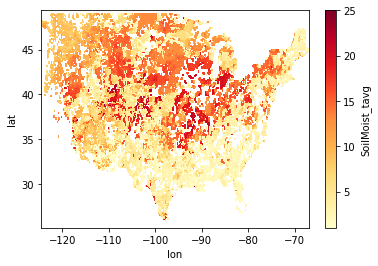

In [23]:
ds2.sel(time=slice('2012-04-01T00:00:00.000000000','2012-10-31T00:00:00.000000000')).mean(dim='time').plot(cmap='YlOrRd')

In [94]:
binary_dur.sel(lon=-92.4375,lat=36.5625)[1000:2000]

<xarray.DataArray 'SoilMoist_tavg' (time: 939)>
array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
...
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])
Coordinates:
    lat      float64 36.56
    lon      float64 -92.44
  * time     (time) datetime64[ns] 1999-11-07 1999-11-14 ... 2017-10-29

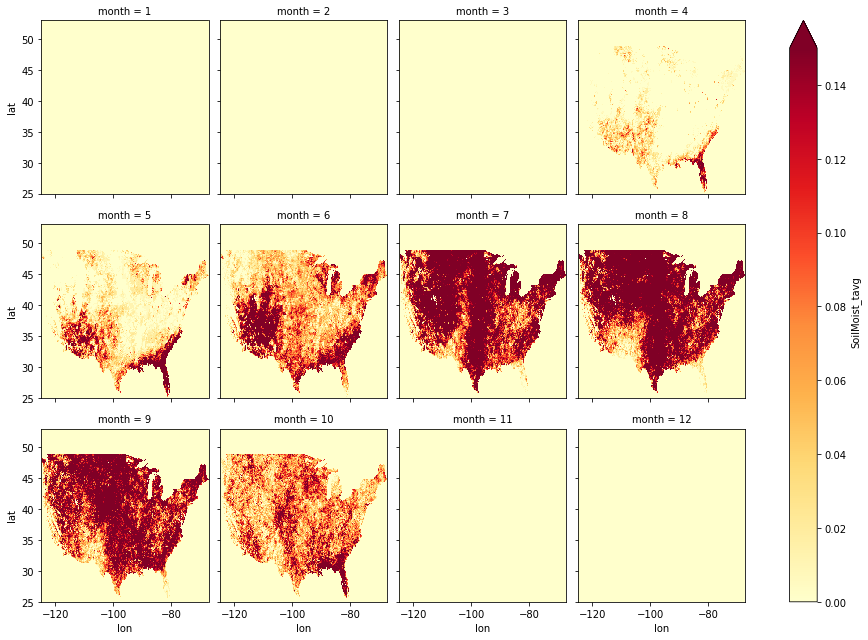

In [16]:
data1 = binary.groupby('time.month').mean(dim='time')

# Plot the output
data1.plot(col='month', col_wrap=4,vmin=0, vmax=.15, cmap='YlOrRd')
plt.show()

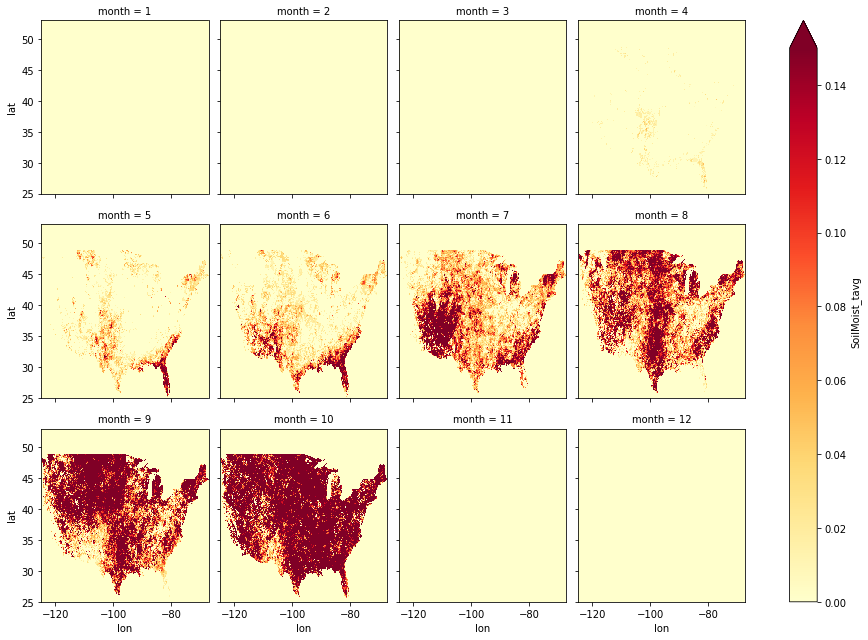

In [35]:
data1 = binary_dur.groupby('time.month').mean(dim='time')

# Plot the output
data1.plot(col='month', col_wrap=4,vmin=0, vmax=.15, cmap='YlOrRd')
plt.show()

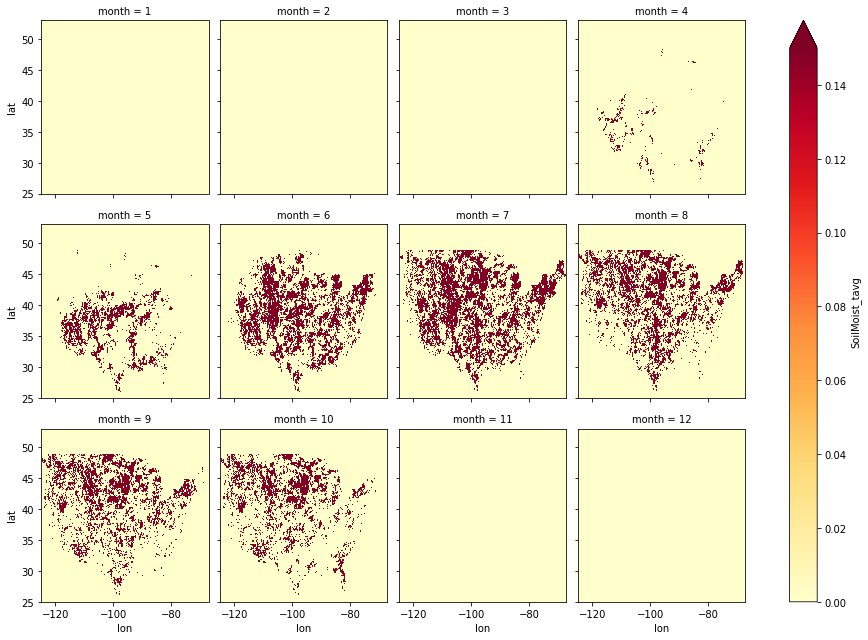

In [17]:
binary_2012 = binary.sel(time=slice('2012-01-01T00:00:00.000000000','2012-12-31T00:00:00.000000000'))

data1 =binary_2012.groupby('time.month').mean(dim='time')

# Plot the output
data1.plot(col='month', col_wrap=4,vmin=0, vmax=.15, cmap='YlOrRd')
plt.show()

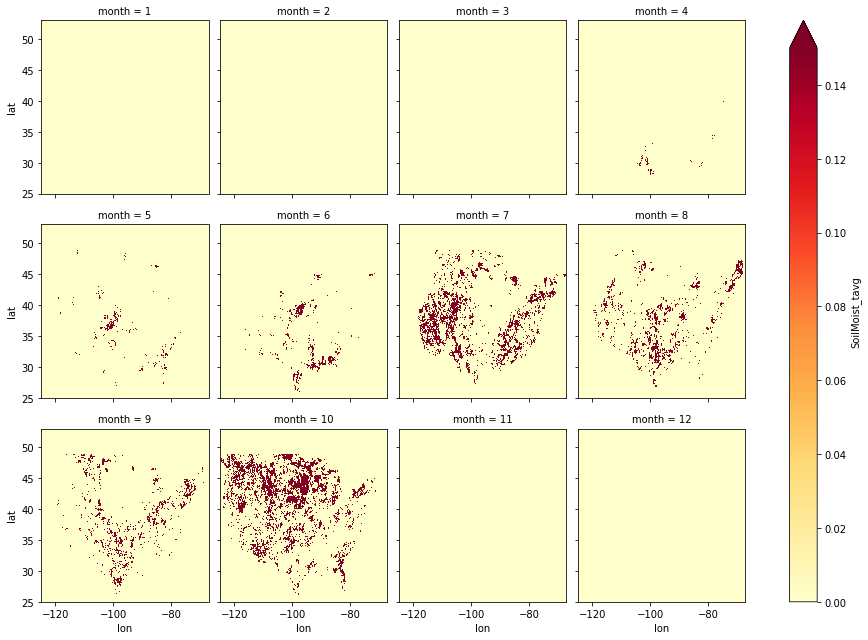

In [38]:
binary_2012 = binary_dur.sel(time=slice('2012-01-01T00:00:00.000000000','2012-12-31T00:00:00.000000000'))

data1 =binary_2012.groupby('time.month').mean(dim='time')

# Plot the output
data1.plot(col='month', col_wrap=4,vmin=0, vmax=.15, cmap='YlOrRd')
plt.show()

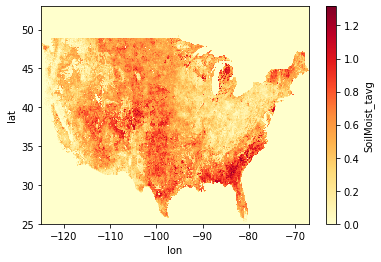

In [124]:
binary_onset_20_yearly.mean(dim="time").plot(cmap='YlOrRd')    ##this shows frequency

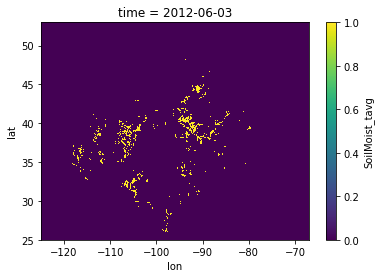

In [76]:
binary_onset_20.isel(time=1656).plot()

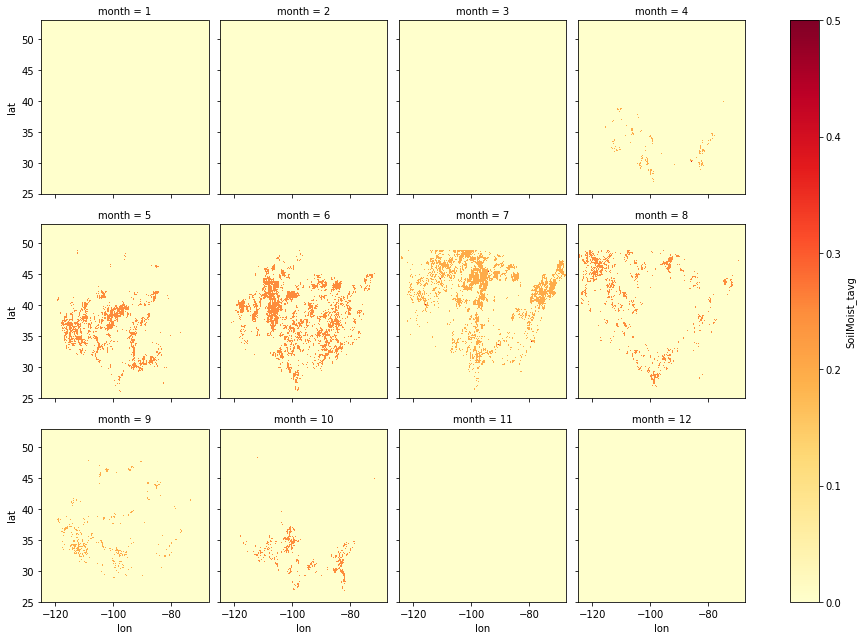

In [68]:
da_2012 = binary_onset_20.sel(time=slice('2012-01-01T00:00:00.000000000','2012-12-31T00:00:00.000000000'))

data1 =da_2012.groupby('time.month').mean(dim='time')

# Plot the output
data1.plot(col='month', col_wrap=4, cmap='YlOrRd')
plt.show()

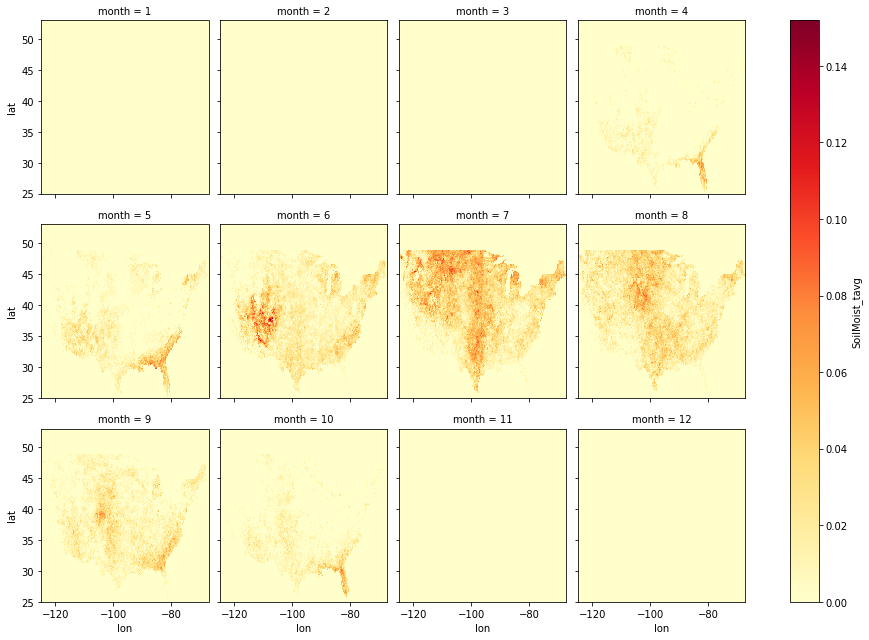

In [69]:


data1 =binary_onset_20.groupby('time.month').mean(dim='time')

# Plot the output
data1.plot(col='month', col_wrap=4, cmap='YlOrRd')
plt.show()

In [93]:
binary_yearly = binary.resample(time="Y").sum()


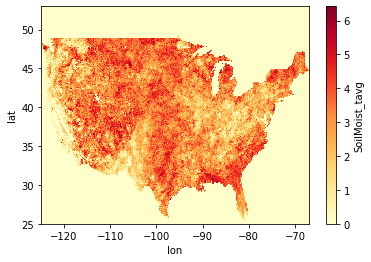

In [137]:
binary_yearly.mean(dim="time").plot(cmap='YlOrRd')    ##this shows duration

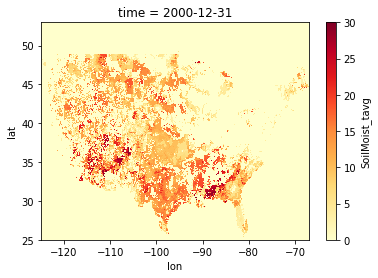

In [138]:
binary_yearly.isel(time=20).plot(cmap='YlOrRd')   #Whole year 2000    #this shows total duration in each year

In [107]:
binary_sev_yearly = binary_sev_norm.resample(time="Y").sum()


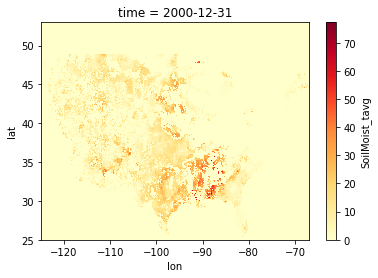

In [139]:
binary_sev_yearly.isel(time=20).plot(cmap='YlOrRd')   #Whole year 2000    #this shows total severity in each year

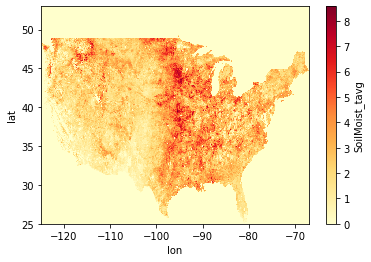

In [140]:
binary_sev_yearly.mean(dim="time").plot(cmap='YlOrRd')    ##this shows severity

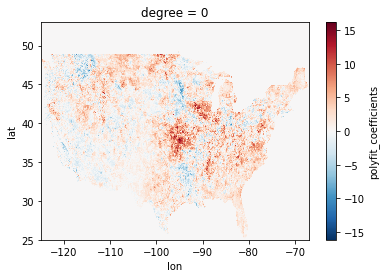

In [142]:
trend = binary_sev_yearly.polyfit("time",deg=1)
trend.polyfit_coefficients.sel(degree=0).plot()   #grap the slop (fitst element) not sure!    #.polyfit_coefficients is a variable here!


In [4]:
data2_DA=xr.open_mfdataset("/glade/scratch/afallah/NLDAS_Files/DA/LIS*.nc", parallel=True)    #16min; reduced using parallel to 10 min
SM_DA = data2_DA.SoilMoist_tavg.mean('SoilMoist_profiles')

SM_DA = SM_DA.sel(time=SM_DA.time.dt.month.isin([4, 5, 6, 7, 8, 9, 10])) 

In [5]:
SM_DA = SM_DA.load() 

In [222]:
data1 = SM_DA.groupby('time.week').mean(dim='time')     
SM_ano = SM_DA.groupby('time.week') - data1

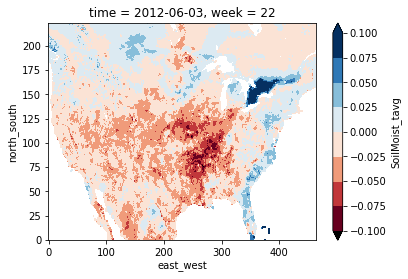

In [223]:
import matplotlib.cm as cm
cmap2 = cm.get_cmap("RdBu",lut=8)
cmap2.set_under("k")

SM_ano.isel(time=7125).plot(cmap=cmap2,vmin=-0.1,vmax=0.1)

In [2]:
data2_OL=xr.open_mfdataset("/glade/scratch/afallah/NLDAS_Files/OL/LIS*.nc", parallel=True)    #16min; reduced using parallel to 10 min
SM_OL = data2_OL.SoilMoist_tavg.mean('SoilMoist_profiles')

SM_OL = SM_OL.sel(time=SM_OL.time.dt.month.isin([4, 5, 6, 7, 8, 9, 10])) 

In [3]:
SM_OL = SM_OL.load() 

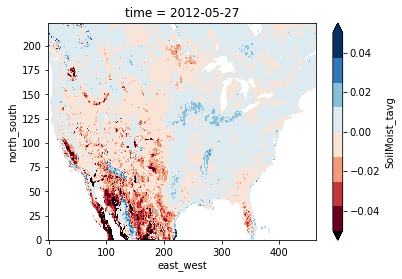

In [28]:
import matplotlib.cm as cm
cmap2 = cm.get_cmap("RdBu",lut=8)
cmap2.set_under("k")

a= SM_DA.isel(time=7118)
b= SM_OL.isel(time=7118)
(a-b).plot(cmap=cmap2,vmin=-0.05,vmax=0.05)

In [9]:
LAI_DA = data2_DA.LAI_tavg
LAI_DA = LAI_DA.sel(time=LAI_DA.time.dt.month.isin([4, 5, 6, 7, 8, 9, 10])) 

In [10]:
LAI_DA = LAI_DA.load() 

In [11]:
LAI_OL = data2_OL.LAI_tavg
LAI_OL = LAI_OL.sel(time=LAI_OL.time.dt.month.isin([4, 5, 6, 7, 8, 9, 10])) 

In [12]:
LAI_OL = LAI_OL.load() 

In [ ]:
data1 = LAI_DA.groupby('time.week').mean(dim='time')     
LAI_DA_ano = LAI_DA.groupby('time.week') - data1

In [ ]:
import matplotlib.cm as cm
cmap2 = cm.get_cmap("BrBG",lut=6)
cmap2.set_under("k")

LAI_DA_ano.isel(time=7125).plot(cmap=cmap2,vmin=-1.5,vmax=1.5)

In [213]:
data2_DA

<xarray.Dataset>
Dimensions:           (SoilMoist_profiles: 4, east_west: 464, north_south: 224, time: 14245)
Coordinates:
  * time              (time) datetime64[ns] 1979-01-03 1979-01-04 ... 2018-01-02
Dimensions without coordinates: SoilMoist_profiles, east_west, north_south
Data variables:
    lat               (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    lon               (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Qle_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Qh_tavg           (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Qg_tavg           (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Evap_tavg         (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Qs_tavg           (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Qsb_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    RadT_tavg         (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Albedo_tavg       (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    SWE_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    SnowDepth_tavg    (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    SoilMoist_tavg    (time, SoilMoist_profiles, north_south, east_west) float32 dask.array<chunksize=(1, 4, 224, 464), meta=np.ndarray>
    WaterTableD_tavg  (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    TWS_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    GWS_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Snowcover_tavg    (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    GPP_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    NPP_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    NEE_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    LAI_tavg          (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    Greenness_tavg    (time, north_south, east_west) float32 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
Attributes:
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [0.1 0.3 0.6 1. ]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  NoahMP.3.6
    history:                 created on date: 2018-10-03T05:09:05.025
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    conventions:             CF-1.6
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   25.0625
    SOUTH_WEST_CORNER_LON:   -124.9375
    DX:                      0.125
    DY:                      0.125

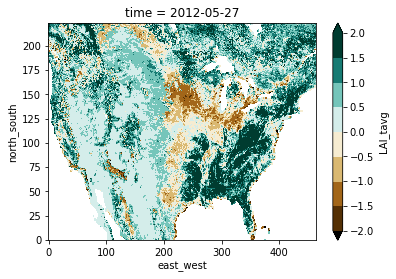

In [29]:
import matplotlib.cm as cm
cmap2 = cm.get_cmap("BrBG",lut=8)
cmap2.set_under("k")

a= LAI_DA.isel(time=7118)
b= LAI_OL.isel(time=7118)
(a-b).plot(cmap=cmap2,vmin=-2,vmax=2)


In [104]:
DA = data2.SoilMoist_tavg.mean('SoilMoist_profiles')

DA = DA.sel(time=DA.time.dt.month.isin([4, 5, 6, 7, 8, 9, 10]))        
DA5 = DA.resample(time="7d").mean()


lat = data2.north_south
lon = data2.east_west

#DA5_US = DA5.sel(east_west=slice(230,300),north_south=slice(25,50),time=slice("1979-01-01","1980-01-01"))   #only 5 years   #change later 1 to 5!  #5min
#DA5_US = DA5.sel(east_west=slice(230,300),north_south=slice(25,50),time=slice("1979-01-01","1988-01-01"))   #only 5 years   #change later 1 to 5!  #5min
#DA5_US = DA5.sel(east_west=slice(130,460),north_south=slice(15,200),time=slice("1981-01-01","2017-01-01"))   #only 5 years   #change later 1 to 5!  #5min

DA5_US = DA5.sel(east_west=slice(200,350),north_south=slice(75,150),time=slice("1980-09-01","2017-10-28"))   #east_west=slice(30,460),north_south=slice(10,200),






In [108]:
DA5_US_point = DA5_US.load() 


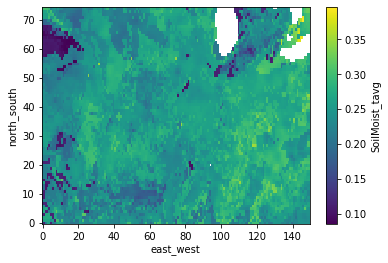

In [111]:
DA5_US_point.sel(time=slice('2012-04-01T00:00:00.000000000','2012-10-30T00:00:00.000000000')).mean(dim="time").plot()

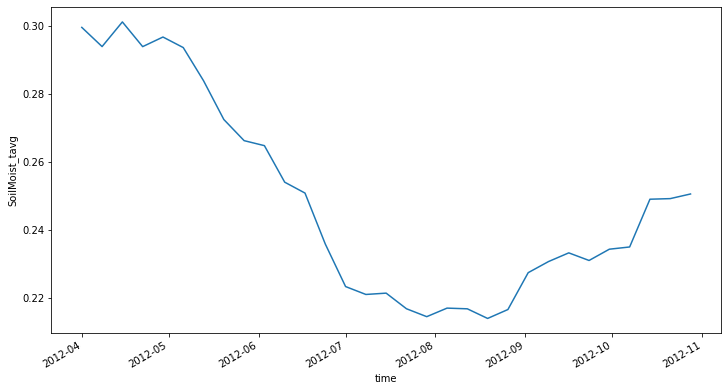

In [109]:
a = DA5_US_point.sel(time=slice('2012-04-01T00:00:00.000000000','2012-10-30T00:00:00.000000000')).mean(dim=("east_west","north_south"))

a.plot(aspect=2, size=6, label="DA")

In [121]:
binary_midwest = binary.sel(lon=slice(-95,-75),lat=slice(37,45))

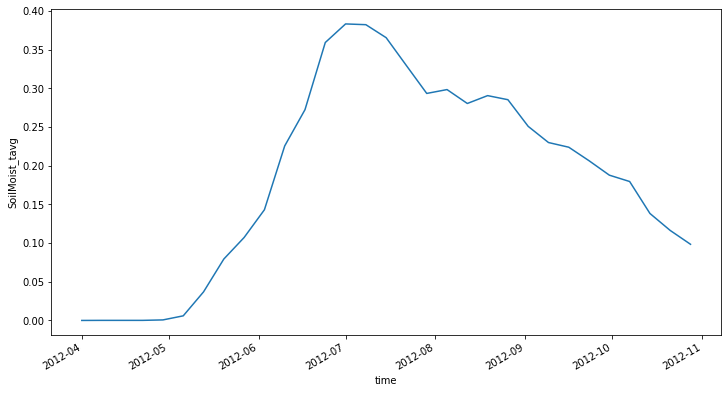

In [122]:
a = binary_midwest.sel(time=slice('2012-04-01T00:00:00.000000000','2012-10-30T00:00:00.000000000')).mean(dim=("lon","lat"))

a.plot(aspect=2, size=6, label="DA")




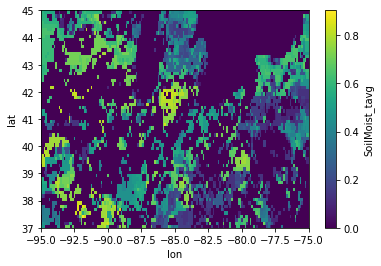

In [123]:
binary_midwest.sel(time=slice('2012-04-01T00:00:00.000000000','2012-10-30T00:00:00.000000000')).mean(dim="time").plot()

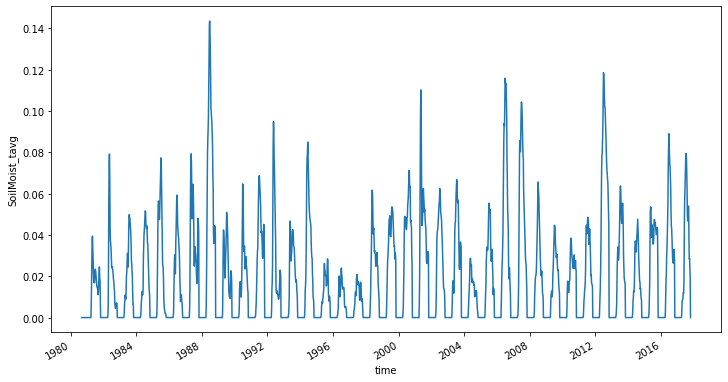

In [33]:
#test
binary.SoilMoist_tavg.mean(dim=["lon","lat"]).plot(aspect=2, size=6,label="DA")